# EDA Case Study
## Problem Statement
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

Understanding the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default will help us identify such applicants

In [1]:
# Supressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

%matplotlib inline

In [3]:
# Importing the application_data csv file.

application_data = pd.read_csv("application_data.csv")
application_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

## Inspection
Doing the routine check of the provided data.

In [4]:
#Checking the shape, columns and data types of the rows.

print(application_data.shape)
print(application_data.info(verbose = True))

(307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL     

## Dropping the unnecessary columns using null percentage
We will be checking for null values and drop the columns having null values higher than 45%, as using such columns might give false outliers and mislead our analysis.


In [5]:
# Checking for null values.

nullp = round(100*(application_data.isnull().sum()/len(application_data.index)), 2)
print(nullp)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [6]:
#Dropping the columns having more than 45% of null-values.
drop_cols = np.where(nullp > 45)
application_data = application_data.drop(application_data.columns[drop_cols], axis =1)

#Checking for the number of remaining columns and the percentage of null values in them.
print(application_data.shape)
null_cols = round(100*(application_data.isnull().sum()/len(application_data.index)), 2) 
print(null_cols)

(307511, 73)
SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL               

# Report - Imputing null values
We can see above that the number of columns remaining are 73 and the columns having around **13%** of null values are: 
1. AMT_REQ_CREDIT_BUREAU_HOUR
2. AMT_REQ_CREDIT_BUREAU_DAY
3. AMT_REQ_CREDIT_BUREAU_WEEK
4. AMT_REQ_CREDIT_BUREAU_MON
5. AMT_REQ_CREDIT_BUREAU_QRT
6. AMT_REQ_CREDIT_BUREAU_YEAR

## Checking for Anomalies and Replacing the values of these columns with relevant data

1. **AMT_REQ_CREDIT_BUREAU_HOUR** - We know that, `24 hours is equal to 1 day`.
> -  We will check if any of the values in this column are greater than 23.
> -  We will check if the percentage of such values is high, if yes, we must subtract the value with 24 and add 1 to the column 'AMT_REQ_CREDIT_BUREAU_WEEK' using indices.


2. **AMT_REQ_CREDIT_BUREAU_DAY** - We know that, `7 days is equal to 1 week`.
> -  We will check if any of the values in this column are greater than 6.
> -  We will check if the percentage of such values is high, if yes, we must subtract the value with 7 and add 1 to the column 'AMT_REQ_CREDIT_BUREAU_WEEK' using indices.
   
3. **AMT_REQ_CREDIT_BUREAU_WEEK** - We know that, `4 weeks is equal to 1 month`. 
> -  We will check if any of the values in this column are greater than 3.
> -  We will check if the percentage of such values is high, if yes, we must subtract the value with 4 and add 1 to the column 'AMT_REQ_CREDIT_BUREAU_MON' using indices.
   
4. **AMT_REQ_CREDIT_BUREAU_MON** - We know that, `3 months is equal to 1 quarter`. 
> -  We will check if any of the values in this column are greater than 2.
> -  We will check if the percentage of such values is high, if yes, we must subtract the value with 3 and add 1 to the column 'AMT_REQ_CREDIT_BUREAU_QRT' using indices .
   
   
5. **AMT_REQ_CREDIT_BUREAU_QRT** - We know that, `4 quarters is equal to 1 year`. 
> -  We will check if any of the values in this column are greater than 3.
> -  We will check if the percentage of such values is high, if yes, we must subtract the value with 4 and add 1 to the column 'AMT_REQ_CREDIT_BUREAU_YEAR' using indices.
   

In [7]:
# Checking the values in AMT_REQ_CREDIT_BUREAU_HOUR having which are greater than 23

j = np.where(application_data.AMT_REQ_CREDIT_BUREAU_HOUR > 23)
for i in j:
    a = len(application_data.AMT_REQ_CREDIT_BUREAU_DAY[i])
    b = round(100*(a/307511), 2)
    print(b)

0.0


In [8]:
# Checking the values in AMT_REQ_CREDIT_BUREAU_DAY having which are greater than 6

x = np.where(application_data.AMT_REQ_CREDIT_BUREAU_DAY > 6)
for i in x:
    a = len(application_data.AMT_REQ_CREDIT_BUREAU_DAY[i])
    b = round(100*(a/307511), 2)
    print(b)

0.0


In [9]:
# Checking the values in AMT_REQ_CREDIT_BUREAU_WEEK having which are greater than 3

y = np.where(application_data.AMT_REQ_CREDIT_BUREAU_WEEK > 3)
for i in y:
    a = len(application_data.AMT_REQ_CREDIT_BUREAU_WEEK[i])
    b = round(100*(a/307511), 2)
    print(b)

0.02


In [10]:
# Checking the values in AMT_REQ_CREDIT_BUREAU_MON which are greater than 2

z = np.where(application_data.AMT_REQ_CREDIT_BUREAU_MON > 2)
for i in z:
    a = len(application_data.AMT_REQ_CREDIT_BUREAU_MON[i])
    b = round(100*(a/307511), 2)
    print(b)

1.7


In [11]:
# Checking the values in AMT_REQ_CREDIT_BUREAU_QRT which are greater than 3

k = np.where(application_data.AMT_REQ_CREDIT_BUREAU_QRT > 3)
for i in k:
    a = len(application_data.AMT_REQ_CREDIT_BUREAU_QRT[i])
    b = round(100*(a/307511), 2)
    print(b)

0.19


> #### Since, the percentage of these values are not high, they do not make a difference to the analysis hence replacing them is not required.

### We need to checking if these columns are Categorical or Continous Values for imputing the correct values.

In [12]:
# Checking if these values are categorical or continuous.
application_data.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL  

> **We can see that the below columns are continous.**
1. AMT_REQ_CREDIT_BUREAU_HOUR          
2. AMT_REQ_CREDIT_BUREAU_DAY           
3. AMT_REQ_CREDIT_BUREAU_WEEK          
4. AMT_REQ_CREDIT_BUREAU_MON          
5. AMT_REQ_CREDIT_BUREAU_QRT          
6. AMT_REQ_CREDIT_BUREAU_YEAR      

## Checking for Outliers
We must check for outliers to see what will be the best metric to impute the missing values.

In [13]:
#Checking the count of the discrete values in the column 'AMT_REQ_CREDIT_BUREAU_HOUR'.
application_data.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

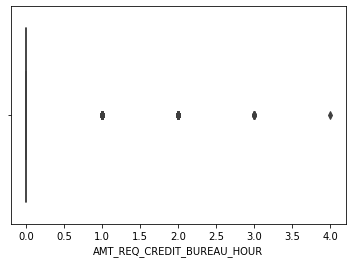

In [14]:
#Checking for outliers

sns.boxplot(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'])

> It looks like the boxblot contains outliers but this is because the number of discrete values in the column AMT_REQ_CREDIT_BUREAU_HOUR are just 4. 

### Using the describe ( ) function

Let us use the describe ( ) function which computes a summary of statistics. This function will give us the mean, std and IQR values. We can check for outliers, using the IQR values.

In [15]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

**We can see that the values at the quartiles 25%, 50%, 75% are all 0 except at 100% which is 4. But, because the value 4 is not really high as compared to others we can conclude that the column AMT_REQ_CREDIT_BUREAU_HOUR have no outliers, hence we can impute the missing values with the mean value that is 0.**

In [16]:
#Checking the count of discrete values in the column 'AMT_REQ_CREDIT_BUREAU_DAY'.
application_data.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

> **We can see that the number of discrete values in this column is low, therefore, using the describe function( ) will give us a better information on outliers.**

In [17]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

**We can see that the values at the quartiles 25%, 50%, 75% are all 0 except at 100% which is 9. But, because the value 9 is not really high as compared to others we can conclude that the column AMT_REQ_CREDIT_BUREAU_DAY have no outliers, hence we can impute the missing values with the mean value that is 0.**

In [18]:
#Checking the count of discrete values in the column 'AMT_REQ_CREDIT_BUREAU_WEEK'.
application_data.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [19]:
# Checking for Outliers using the IQR Values.
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

**We can see that the values at the quartiles 25%, 50%, 75% are all 0 except at 100% which is 8. But, because the value 8 is not really high as compared to others we can conclude that the column AMT_REQ_CREDIT_BUREAU_WEEK have no outliers, hence we can impute the missing values with the mean value that is 0.**

In [20]:
#Checking the count of discrete values in the column 'AMT_REQ_CREDIT_BUREAU_MON'.
application_data.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [21]:
# Checking for outliers using the IQR Values
application_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

**We can see that the values at the quartiles 25%, 50%, 75% are all 0 except at 100% which is 27. But, because the value 27 is not really high as compared to others we can conclude that the column AMT_REQ_CREDIT_BUREAU_MON have no outliers, hence we can impute the missing values with the mean value that is 0.**

In [22]:
#Checking the count of discrete values in the column 'AMT_REQ_CREDIT_BUREAU_QRT'.
application_data.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

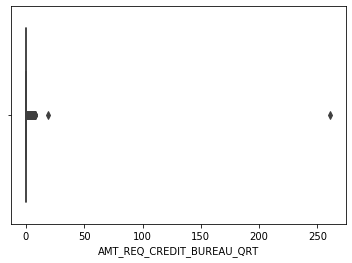

In [23]:
#Checking for outliers using boxplot.
sns.boxplot(application_data['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.show()

**We can observe that the column AMT_REQ_CREDIT_BUREAU_QRT have outliers, hence we can impute the missing values with the median value.**

In [24]:
# Finding the median of the column AMT_REQ_CREDIT_BUREAU_QRT
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].median()

0.0

**We can see that the median value is 0. Hence, we can impute the missing values in AMT_REQ_CREDIT_BUREAU_QRT with 0.**

In [25]:
#Checking the count of discrete values in the column 'AMT_REQ_CREDIT_BUREAU_QRT'.
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

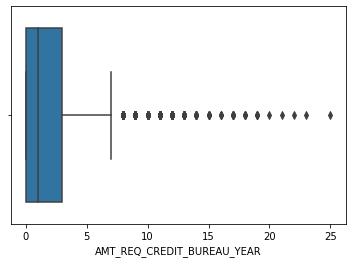

In [26]:
# Checking for outliers using boxplot.
sns.boxplot(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'])

**We can observe that the column AMT_REQ_CREDIT_BUREAU_YEAR have outliers, hence we can impute the missing values with the median value.**

In [27]:
# Checking for median value.
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median()

1.0

**The median value is 1, hence the missing values in AMT_REQ_CREDIT_BUREAU_YEAR can be imputed by 1.**

# Subset of the Data

Let us take a subset of the application data, considering only those variables which are significant enough to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

In [28]:
analyze_subset = application_data[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE',
                              'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL',
                              'AMT_CREDIT', 'AMT_ANNUITY','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                              'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH','DAYS_EMPLOYED',
                              'FLAG_MOBIL','FLAG_PHONE','OCCUPATION_TYPE','CNT_FAM_MEMBERS',
                              'REG_REGION_NOT_LIVE_REGION','ORGANIZATION_TYPE',
                              'EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE',
                              'FLAG_DOCUMENT_3']]
analyze_subset.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002       1         Cash loans            N               Y   
1      100003       0         Cash loans            N               N   
2      100004       0    Revolving loans            Y               Y   
3      100006       0         Cash loans            N               Y   
4      100007       0         Cash loans            N               Y   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY NAME_INCOME_TYPE  \
0          202500.0    406597.5      24700.5          Working   
1          270000.0   1293502.5      35698.5    State servant   
2           67500.0    135000.0       6750.0          Working   
3          135000.0    312682.5      29686.5          Working   
4          121500.0    513000.0      21865.5          Working   

             NAME_EDUCATION_TYPE  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  House / apartment   
1               Higher education  House / apartment   
2  Secondary / secondary special  House / apartment   
3  Secondary / secondary special  House / apartment   
4  Secondary / secondary special  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  \
0                    0.018801       -9461           -637           1   
1                    0.003541      -16765          -1188           1   
2                    0.010032      -19046           -225           1   
3                    0.008019      -19005          -3039           1   
4                    0.028663      -19932          -3038           1   

   FLAG_PHONE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REG_REGION_NOT_LIVE_REGION  \
0           1        Laborers              1.0                           0   
1           1      Core staff              2.0                           0   
2           1        Laborers              1.0                           0   
3           0        Laborers              2.0                           0   
4           0      Core staff              1.0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  \
0  Business Entity Type 3      0.262949      0.139376                 -1134.0   
1                  School      0.622246           NaN                  -828.0   
2              Government      0.555912      0.729567                  -815.0   
3  Business Entity Type 3      0.650442           NaN                  -617.0   
4                Religion      0.322738           NaN                 -1106.0   

   FLAG_DOCUMENT_3  
0                1  
1                1  
2                0  
3                1  
4                0

In [29]:
analyze_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 24 columns):
SK_ID_CURR                    307511 non-null int64
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
REGION_POPULATION_RELATIVE    307511 non-null float64
DAYS_BIRTH                    307511 non-null int64
DAYS_EMPLOYED                 307511 non-null int64
FLAG_MOBIL                    307511 non-null int64
FLAG_PHONE                    307511 non-null int64
OCCUPATION_TYPE               211120 non-nu

## Reasoning for the Subset taken
### The reason behind considering only these 24 columns is as mentioned below:
1. <ins>SK_ID_CURR</ins> - This is the ID of Loan in the Sample, without this identification of the applicants would be impossible.
2. <ins>TARGET</ins> - This is one of the main variables which tells us if the applicant has major payment difficulties or not.
3. <ins>NAME_CONTRACT_TYPE</ins> -  This identifies if the Loan is in Cash or is revolving, which very important.
4. <ins>FLAG_OWN_CAR</ins> - Gives us an idea about the applicant's financial liabilities/assets.
5. <ins>FLAG_OWN_REALTY</ins> - Gives us an idea about the applicant's financial liabilities/assets.
6. <ins>AMT_INCOME_TOTAL</ins> - One of the main variables based on which the Loan is Approved/Rejected.
7. <ins>AMT_CREDIT</ins> - One of the main variables using which the amount of repayment/interest/Late-Payment Fee can be caculated.
8. <ins>AMT_ANNUITY</ins> - One of the main variables using which the amount of repayment/interest/Late-Payment Fee is caculated.
9. <ins>NAME_INCOME_TYPE</ins> - One of the main variables using which we can predict of the client's nature of income such as predicting whether there are a chances for the income to decrease/increase/stop.
10. <ins>NAME_EDUCATION_TYPE</ins> - Gives us an idea about what kind of income the client is capable to receive.
11. <ins>NAME_HOUSING_TYPE</ins> - Gives us an idea about the client's financial liabilities/assets.
12. <ins>REGION_POPULATION_RELATIVE</ins> - 
13. <ins>DAYS_BIRTH</ins> - One of the major variables to decide if the loan can be approved, for example - the age group of 30-50 years is considered more as people seem to be more financially stable at that age.
14. <ins>DAYS_EMPLOYED</ins> - One of the major variables to decide if the loan can be approved, for example - people who have been serving in a company for at least three years are most preferred.
15. <ins>FLAG_MOBIL</ins> - 
16. <ins>FLAG_PHONE</ins> -         
17. <ins>OCCUPATION_TYPE</ins>  
18. <ins>CNT_FAM_MEMBERS</ins>      
19. <ins>REG_REGION_NOT_LIVE_REGION</ins>
20. <ins>ORGANIZATION_TYPE</ins>  
21. <ins>EXT_SOURCE_2</ins>
22. <ins>EXT_SOURCE_3</ins>  
23. <ins>DAYS_LAST_PHONE_CHANGE</ins>   
24. <ins>FLAG_DOCUMENT_3</ins> - Checking if the client has provided the document or not is very important for authentication. 
> The reason for using this particular FLAG_DOCUMENT_3 variable out of all the Flag Document variables is because this variable had the highest number of documents provided and highest correlation as compared with others. This was checked using the codes: 
For Counts - application_data.FLAG_DOCUMENT_13.value_counts( ), and
For Correlation - flag_documents.corr( ) and a heatmap was plotted.

## Checking the Datatypes
Let us check the datatypes of the columns in our subset to see if all the variables have correct datatypes.

In [30]:
analyze_subset.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
FLAG_MOBIL                      int64
FLAG_PHONE                      int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
REG_REGION_NOT_LIVE_REGION      int64
ORGANIZATION_TYPE              object
EXT_SOURCE_2                  float64
EXT_SOURCE_3                  float64
DAYS_LAST_PHONE_CHANGE        float64
FLAG_DOCUMENT_3                 int64
dtype: object

In [31]:
analyze_subset.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002       1         Cash loans            N               Y   
1      100003       0         Cash loans            N               N   
2      100004       0    Revolving loans            Y               Y   
3      100006       0         Cash loans            N               Y   
4      100007       0         Cash loans            N               Y   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY NAME_INCOME_TYPE  \
0          202500.0    406597.5      24700.5          Working   
1          270000.0   1293502.5      35698.5    State servant   
2           67500.0    135000.0       6750.0          Working   
3          135000.0    312682.5      29686.5          Working   
4          121500.0    513000.0      21865.5          Working   

             NAME_EDUCATION_TYPE  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  House / apartment   
1               Higher education  House / apartment   
2  Secondary / secondary special  House / apartment   
3  Secondary / secondary special  House / apartment   
4  Secondary / secondary special  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  \
0                    0.018801       -9461           -637           1   
1                    0.003541      -16765          -1188           1   
2                    0.010032      -19046           -225           1   
3                    0.008019      -19005          -3039           1   
4                    0.028663      -19932          -3038           1   

   FLAG_PHONE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REG_REGION_NOT_LIVE_REGION  \
0           1        Laborers              1.0                           0   
1           1      Core staff              2.0                           0   
2           1        Laborers              1.0                           0   
3           0        Laborers              2.0                           0   
4           0      Core staff              1.0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  \
0  Business Entity Type 3      0.262949      0.139376                 -1134.0   
1                  School      0.622246           NaN                  -828.0   
2              Government      0.555912      0.729567                  -815.0   
3  Business Entity Type 3      0.650442           NaN                  -617.0   
4                Religion      0.322738           NaN                 -1106.0   

   FLAG_DOCUMENT_3  
0                1  
1                1  
2                0  
3                1  
4                0

### Converting the variables which are in Boolean, to object datatype.
The variables in Boolean and which are not of object datatype are:
1. TARGET
2. FLAG_DOCUMENT_3 
2. FLAG_MOBIL
3. FLAG_PHONE

In [32]:
analyze_subset['FLAG_DOCUMENT_3'] = analyze_subset['FLAG_DOCUMENT_3'].astype(str)
analyze_subset['FLAG_MOBIL'] = analyze_subset['FLAG_MOBIL'].astype(str)
analyze_subset['FLAG_PHONE'] = analyze_subset['FLAG_PHONE'].astype(str)
analyze_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 24 columns):
SK_ID_CURR                    307511 non-null int64
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
REGION_POPULATION_RELATIVE    307511 non-null float64
DAYS_BIRTH                    307511 non-null int64
DAYS_EMPLOYED                 307511 non-null int64
FLAG_MOBIL                    307511 non-null object
FLAG_PHONE                    307511 non-null object
OCCUPATION_TYPE               211120 non-

In [33]:
# Converting the Negative Variables to positive variables where needed.
# Converting the age variable to years.

## CONVERTING DAYS_BIRTH COLUMN FROM NEGATIVE TO POSITIVE
analyze_subset['DAYS_BIRTH'] = analyze_subset['DAYS_BIRTH'] * -1
analyze_subset.head()

## CONVERTING DAYS_BIRTH INTO AGE
analyze_subset['DAYS_BIRTH'] = analyze_subset['DAYS_BIRTH']//365
analyze_subset.head()

##CHANGING COLUMN NAME FROM DAYS_BIRTH TO AGE_IN_YEARS
analyze_subset.rename(columns = {'DAYS_BIRTH':'AGE_IN_YEARS'},inplace=True)

# CONVERTING DAYS_BIRTH COLUMN FROM NEGATIVE TO POSITIVE
analyze_subset.DAYS_EMPLOYED = analyze_subset['DAYS_EMPLOYED'] * (-1)

analyze_subset.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002       1         Cash loans            N               Y   
1      100003       0         Cash loans            N               N   
2      100004       0    Revolving loans            Y               Y   
3      100006       0         Cash loans            N               Y   
4      100007       0         Cash loans            N               Y   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY NAME_INCOME_TYPE  \
0          202500.0    406597.5      24700.5          Working   
1          270000.0   1293502.5      35698.5    State servant   
2           67500.0    135000.0       6750.0          Working   
3          135000.0    312682.5      29686.5          Working   
4          121500.0    513000.0      21865.5          Working   

             NAME_EDUCATION_TYPE  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  House / apartment   
1               Higher education  House / apartment   
2  Secondary / secondary special  House / apartment   
3  Secondary / secondary special  House / apartment   
4  Secondary / secondary special  House / apartment   

   REGION_POPULATION_RELATIVE  AGE_IN_YEARS  DAYS_EMPLOYED FLAG_MOBIL  \
0                    0.018801            25            637          1   
1                    0.003541            45           1188          1   
2                    0.010032            52            225          1   
3                    0.008019            52           3039          1   
4                    0.028663            54           3038          1   

  FLAG_PHONE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REG_REGION_NOT_LIVE_REGION  \
0          1        Laborers              1.0                           0   
1          1      Core staff              2.0                           0   
2          1        Laborers              1.0                           0   
3          0        Laborers              2.0                           0   
4          0      Core staff              1.0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  \
0  Business Entity Type 3      0.262949      0.139376                 -1134.0   
1                  School      0.622246           NaN                  -828.0   
2              Government      0.555912      0.729567                  -815.0   
3  Business Entity Type 3      0.650442           NaN                  -617.0   
4                Religion      0.322738           NaN                 -1106.0   

  FLAG_DOCUMENT_3  
0               1  
1               1  
2               0  
3               1  
4               0

## Checking for Outliers - Numerical Values

We are checking for outliers in the columns - *AMT_INCOME_TOTAL, AMT_CREDIT, EXT_SOURCE_2, DAYS_EMPLOYED*

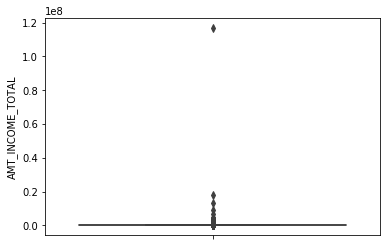

In [34]:
# For the column 'AMT_INCOME_TOTAL'
sns.boxplot(y = analyze_subset['AMT_INCOME_TOTAL'])
plt.show()

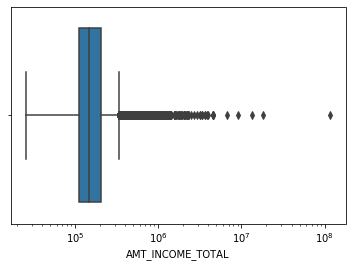

In [35]:
# Let us use the log function, to get a proper view of the boxplot, as the values are too high.

sns.boxplot(x = analyze_subset['AMT_INCOME_TOTAL'])
plt.xscale('log') 
plt.show()

**We can see that there are outliers in the column 'AMT_INCOME_TOTAL'. Let us check the percentiles of these outliers and their values.**

In [36]:
# Checking for outliers and their values at percentiles.
analyze_subset.AMT_INCOME_TOTAL.quantile([0.90,0.95,0.98,0.99, 1])

0.90       270000.0
0.95       337500.0
0.98       427500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

**We can observe that the outliers are lieing after 99th percentile and the value is really high as compared with other percentile values. Hence, capping the higher values with the 99th percentile value give us a better analysis.**

In [37]:
# Capping the values
analyze_subset.loc[analyze_subset.AMT_INCOME_TOTAL > analyze_subset.AMT_INCOME_TOTAL.quantile(0.99), 
                   'AMT_INCOME_TOTAL'] = analyze_subset.AMT_INCOME_TOTAL.quantile(0.99)

In [38]:
analyze_subset.AMT_INCOME_TOTAL.quantile([0.90,0.95,0.98,0.99, 1])

0.90    270000.0
0.95    337500.0
0.98    427500.0
0.99    472500.0
1.00    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

**Therefore, we can see that the outliers have been capped, which will help the analysis to be more perspicuous.**

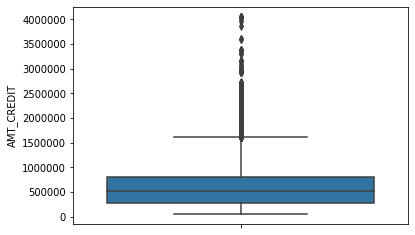

In [39]:
# For the column 'AMT_CREDIT'
sns.boxplot(y = analyze_subset['AMT_CREDIT'])
plt.show()

In [40]:
# Checking for values between 90th to 100th percentile
analyze_subset.AMT_CREDIT.quantile([0.90,0.95,0.98,0.99, 1])

0.90    1133748.0
0.95    1350000.0
0.98    1661418.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

**We can observe that the outliers are lieing after 99th percentile and the value is really high as compared with other percentile values. Hence, capping the higher values with the 99th percentile value give us a better analysis.**

In [41]:
# Capping the values
analyze_subset.loc[analyze_subset.AMT_CREDIT > analyze_subset.AMT_CREDIT.quantile(0.99), 
                   'AMT_CREDIT'] = analyze_subset.AMT_CREDIT.quantile(0.99)

In [42]:
analyze_subset.AMT_CREDIT.quantile([0.90,0.95,0.98,0.99, 1])

0.90    1133748.0
0.95    1350000.0
0.98    1661418.0
0.99    1854000.0
1.00    1854000.0
Name: AMT_CREDIT, dtype: float64

**Therefore, we can see that the outliers have been capped, which will help the analysis to be more perspicuous.**

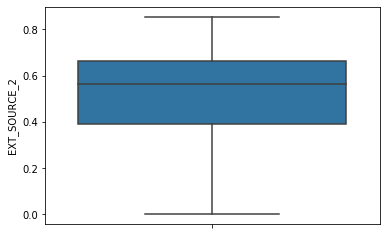

In [43]:
# Checking outliers for the column EXT_SOURCE_2
sns.boxplot(y = analyze_subset['EXT_SOURCE_2'])
plt.show()

**We can see that there are no outliers in this column.**

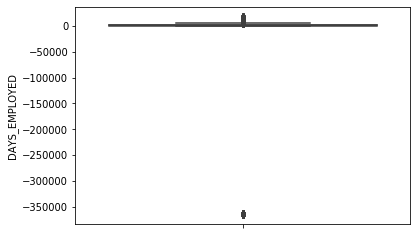

In [44]:
# Checking outliers for the column DAYS_EMPLOYED
sns.boxplot(y = analyze_subset['DAYS_EMPLOYED'])
plt.show()

**We can see that there are major outliers, which are less than 0.**

In [45]:
# Checking the outlier values which are less than 0.
analyze_subset.DAYS_EMPLOYED.value_counts(normalize = True)

-365243    0.180072
 200       0.000507
 224       0.000494
 230       0.000491
 199       0.000491
             ...   
 11555     0.000003
 14719     0.000003
 11133     0.000003
 13344     0.000003
 14991     0.000003
Name: DAYS_EMPLOYED, Length: 12574, dtype: float64

**Since these outlier values are just in 18% of the data, we can drop these values and continue with out analysis as they will not make much difference in getting the inference.**

In [46]:
demp_outlier = np.where(analyze_subset.DAYS_EMPLOYED < 0)
analyze_subset = analyze_subset.drop(analyze_subset.index[demp_outlier], axis =0)

In [47]:
analyze_subset.DAYS_EMPLOYED.quantile([0.90,0.95,0.98,0.99, 1])

0.90     5333.00
0.95     7291.00
0.98     9724.00
0.99    11338.28
1.00    17912.00
Name: DAYS_EMPLOYED, dtype: float64

**Therefore, we can see that the outliers have been capped, which will help the analysis to be more perspicuous.**

# Binning of Continuous Variables
We know that one of main variables are Income Variable and Loan Annuity variables. Let us bin these variables.

In [48]:
# Binning the column AMT_ANNUITY
bins = analyze_subset.AMT_ANNUITY.quantile([0,0.25,0.50,0.75,1])
group_name = ['Low','Medium','High','Very High']
analyze_subset['ANNUITY_BINNED'] = pd.cut(analyze_subset['AMT_ANNUITY'],bins,labels=group_name,include_lowest = True)

# Binning the column AMT_INCOME_TOTAL
bins_1 = analyze_subset.AMT_INCOME_TOTAL.quantile([0,0.25,0.50,0.75,1])
group_name_1 = ['Low','Medium','High','Very High']
analyze_subset['INCOME_BINNED'] = pd.cut(analyze_subset['AMT_INCOME_TOTAL'],bins_1,labels=group_name_1,include_lowest = True)

# Binning the column AMT_CREDIT
bins_2 = analyze_subset.AMT_CREDIT.quantile([0,0.25,0.50,0.75,1])
group_name_2 = ['Low','Medium','High','Very High']
analyze_subset['CREDIT_BINNED'] = pd.cut(analyze_subset['AMT_CREDIT'],bins_2,labels=group_name_2,include_lowest = True)

# Binning the column DAYS_LAST_PHONE_CHANGE
analyze_subset.DAYS_LAST_PHONE_CHANGE = analyze_subset['DAYS_LAST_PHONE_CHANGE'] * (-1) #Converting it to positive as the values are negative
bins_3 = analyze_subset.DAYS_LAST_PHONE_CHANGE.quantile([0,0.25,0.50,0.75,1])
group_name_3 = ['Low','Medium','High','Very High']
analyze_subset['DAYS_LAST_PHONE_CHANGE_BINNED']= pd.cut(analyze_subset['DAYS_LAST_PHONE_CHANGE'],bins_3,labels=group_name_3,include_lowest = True)

analyze_subset.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002       1         Cash loans            N               Y   
1      100003       0         Cash loans            N               N   
2      100004       0    Revolving loans            Y               Y   
3      100006       0         Cash loans            N               Y   
4      100007       0         Cash loans            N               Y   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY NAME_INCOME_TYPE  \
0          202500.0    406597.5      24700.5          Working   
1          270000.0   1293502.5      35698.5    State servant   
2           67500.0    135000.0       6750.0          Working   
3          135000.0    312682.5      29686.5          Working   
4          121500.0    513000.0      21865.5          Working   

             NAME_EDUCATION_TYPE  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  House / apartment   
1               Higher education  House / apartment   
2  Secondary / secondary special  House / apartment   
3  Secondary / secondary special  House / apartment   
4  Secondary / secondary special  House / apartment   

   REGION_POPULATION_RELATIVE  AGE_IN_YEARS  DAYS_EMPLOYED FLAG_MOBIL  \
0                    0.018801            25            637          1   
1                    0.003541            45           1188          1   
2                    0.010032            52            225          1   
3                    0.008019            52           3039          1   
4                    0.028663            54           3038          1   

  FLAG_PHONE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REG_REGION_NOT_LIVE_REGION  \
0          1        Laborers              1.0                           0   
1          1      Core staff              2.0                           0   
2          1        Laborers              1.0                           0   
3          0        Laborers              2.0                           0   
4          0      Core staff              1.0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  \
0  Business Entity Type 3      0.262949      0.139376                  1134.0   
1                  School      0.622246           NaN                   828.0   
2              Government      0.555912      0.729567                   815.0   
3  Business Entity Type 3      0.650442           NaN                   617.0   
4                Religion      0.322738           NaN                  1106.0   

  FLAG_DOCUMENT_3 ANNUITY_BINNED INCOME_BINNED CREDIT_BINNED  \
0               1         Medium          High        Medium   
1               1      Very High     Very High     Very High   
2               0            Low           Low           Low   
3               1           High        Medium        Medium   
4               0         Medium        Medium        Medium   

  DAYS_LAST_PHONE_CHANGE_BINNED  
0                          High  
1                          High  
2                          High  
3                        Medium  
4                          High

In [49]:
analyze_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 28 columns):
SK_ID_CURR                       252137 non-null int64
TARGET                           252137 non-null int64
NAME_CONTRACT_TYPE               252137 non-null object
FLAG_OWN_CAR                     252137 non-null object
FLAG_OWN_REALTY                  252137 non-null object
AMT_INCOME_TOTAL                 252137 non-null float64
AMT_CREDIT                       252137 non-null float64
AMT_ANNUITY                      252125 non-null float64
NAME_INCOME_TYPE                 252137 non-null object
NAME_EDUCATION_TYPE              252137 non-null object
NAME_HOUSING_TYPE                252137 non-null object
REGION_POPULATION_RELATIVE       252137 non-null float64
AGE_IN_YEARS                     252137 non-null int64
DAYS_EMPLOYED                    252137 non-null int64
FLAG_MOBIL                       252137 non-null object
FLAG_PHONE                       252137 non-null 

In [50]:
# Placing the Binned and Orginal Columns beside each other.

analyze_subset = analyze_subset[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE',
                              'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'INCOME_BINNED',
                              'AMT_CREDIT','CREDIT_BINNED', 'AMT_ANNUITY', 'ANNUITY_BINNED' ,'NAME_INCOME_TYPE', 
                              'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS','DAYS_EMPLOYED',
                              'FLAG_MOBIL','FLAG_PHONE','OCCUPATION_TYPE','CNT_FAM_MEMBERS',
                              'REG_REGION_NOT_LIVE_REGION','ORGANIZATION_TYPE',
                              'EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE', 'DAYS_LAST_PHONE_CHANGE_BINNED',
                              'FLAG_DOCUMENT_3']]
analyze_subset.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002       1         Cash loans            N               Y   
1      100003       0         Cash loans            N               N   
2      100004       0    Revolving loans            Y               Y   
3      100006       0         Cash loans            N               Y   
4      100007       0         Cash loans            N               Y   

   AMT_INCOME_TOTAL INCOME_BINNED  AMT_CREDIT CREDIT_BINNED  AMT_ANNUITY  \
0          202500.0          High    406597.5        Medium      24700.5   
1          270000.0     Very High   1293502.5     Very High      35698.5   
2           67500.0           Low    135000.0           Low       6750.0   
3          135000.0        Medium    312682.5        Medium      29686.5   
4          121500.0        Medium    513000.0        Medium      21865.5   

  ANNUITY_BINNED NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         Medium          Working  Secondary / secondary special   
1      Very High    State servant               Higher education   
2            Low          Working  Secondary / secondary special   
3           High          Working  Secondary / secondary special   
4         Medium          Working  Secondary / secondary special   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  AGE_IN_YEARS  DAYS_EMPLOYED  \
0  House / apartment                    0.018801            25            637   
1  House / apartment                    0.003541            45           1188   
2  House / apartment                    0.010032            52            225   
3  House / apartment                    0.008019            52           3039   
4  House / apartment                    0.028663            54           3038   

  FLAG_MOBIL FLAG_PHONE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0          1          1        Laborers              1.0   
1          1          1      Core staff              2.0   
2          1          1        Laborers              1.0   
3          1          0        Laborers              2.0   
4          1          0      Core staff              1.0   

   REG_REGION_NOT_LIVE_REGION       ORGANIZATION_TYPE  EXT_SOURCE_2  \
0                           0  Business Entity Type 3      0.262949   
1                           0                  School      0.622246   
2                           0              Government      0.555912   
3                           0  Business Entity Type 3      0.650442   
4                           0                Religion      0.322738   

   EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE DAYS_LAST_PHONE_CHANGE_BINNED  \
0      0.139376                  1134.0                          High   
1           NaN                   828.0                          High   
2      0.729567                   815.0                          High   
3           NaN                   617.0                        Medium   
4           NaN                  1106.0                          High   

  FLAG_DOCUMENT_3  
0               1  
1               1  
2               0  
3               1  
4               0

In [51]:
analyze_subset.info()
print(analyze_subset.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 28 columns):
SK_ID_CURR                       252137 non-null int64
TARGET                           252137 non-null int64
NAME_CONTRACT_TYPE               252137 non-null object
FLAG_OWN_CAR                     252137 non-null object
FLAG_OWN_REALTY                  252137 non-null object
AMT_INCOME_TOTAL                 252137 non-null float64
INCOME_BINNED                    252137 non-null category
AMT_CREDIT                       252137 non-null float64
CREDIT_BINNED                    252137 non-null category
AMT_ANNUITY                      252125 non-null float64
ANNUITY_BINNED                   252125 non-null category
NAME_INCOME_TYPE                 252137 non-null object
NAME_EDUCATION_TYPE              252137 non-null object
NAME_HOUSING_TYPE                252137 non-null object
REGION_POPULATION_RELATIVE       252137 non-null float64
AGE_IN_YEARS                     252137 n

# Analysis
## Checking Imbalance Percentage

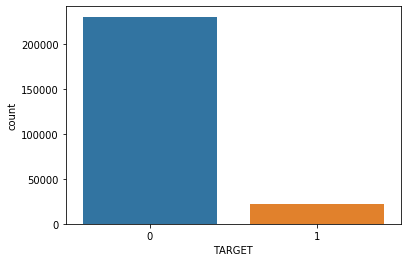

In [52]:
sns.countplot('TARGET',data = analyze_subset)
plt.show()

In [53]:
# Checking the imbalance percentage
count_non_def = len(analyze_subset[analyze_subset['TARGET']==0])
count_def = len(analyze_subset[analyze_subset['TARGET']==1])
perc_non_def = 100*count_non_def/len(analyze_subset['TARGET'])
perc_def = 100*count_def/len(analyze_subset['TARGET'])
print('Percentage of non-defaulters =', perc_non_def)
print('Percentage of defaulters=',  perc_def)

Percentage of non-defaulters = 91.34002546234785
Percentage of defaulters= 8.659974537652149


## Divinding the Data by the Target Column

In [54]:
tar_1 = analyze_subset.loc[analyze_subset['TARGET']==1,:]
tar_1.shape

(21835, 28)

In [55]:
tar_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21835 entries, 0 to 307509
Data columns (total 28 columns):
SK_ID_CURR                       21835 non-null int64
TARGET                           21835 non-null int64
NAME_CONTRACT_TYPE               21835 non-null object
FLAG_OWN_CAR                     21835 non-null object
FLAG_OWN_REALTY                  21835 non-null object
AMT_INCOME_TOTAL                 21835 non-null float64
INCOME_BINNED                    21835 non-null category
AMT_CREDIT                       21835 non-null float64
CREDIT_BINNED                    21835 non-null category
AMT_ANNUITY                      21835 non-null float64
ANNUITY_BINNED                   21835 non-null category
NAME_INCOME_TYPE                 21835 non-null object
NAME_EDUCATION_TYPE              21835 non-null object
NAME_HOUSING_TYPE                21835 non-null object
REGION_POPULATION_RELATIVE       21835 non-null float64
AGE_IN_YEARS                     21835 non-null int64
DAY

In [56]:
tar_0 = analyze_subset.loc[analyze_subset['TARGET']==0,:]
tar_0.shape

(230302, 28)

In [57]:
tar_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230302 entries, 1 to 307510
Data columns (total 28 columns):
SK_ID_CURR                       230302 non-null int64
TARGET                           230302 non-null int64
NAME_CONTRACT_TYPE               230302 non-null object
FLAG_OWN_CAR                     230302 non-null object
FLAG_OWN_REALTY                  230302 non-null object
AMT_INCOME_TOTAL                 230302 non-null float64
INCOME_BINNED                    230302 non-null category
AMT_CREDIT                       230302 non-null float64
CREDIT_BINNED                    230302 non-null category
AMT_ANNUITY                      230290 non-null float64
ANNUITY_BINNED                   230290 non-null category
NAME_INCOME_TYPE                 230302 non-null object
NAME_EDUCATION_TYPE              230302 non-null object
NAME_HOUSING_TYPE                230302 non-null object
REGION_POPULATION_RELATIVE       230302 non-null float64
AGE_IN_YEARS                     230302 n

## Univariate Analysis for Categorical Variables
The Categorical Variables in this data are:
1. NAME_CONTRACT_TYPE
2. FLAG_OWN_CAR
3. FLAG_OWN_REALTY
4. INCOME_BINNED
5. ANNUITY_BINNED
6. CREDIT_BINNED
6. NAME_INCOME_TYPE 
7. NAME_EDUCATION_TYPE
8. NAME_HOUSING_TYPE 
9. OCCUPATION_TYPE
10. ORGANIZATION_TYPE
11. FLAG_MOBIL
12. FLAG_PHONE
13. DAYS_LAST_PHONE_CHANGE_BINNED
14. FLAG_DOCUMENT_3

## For the Dataframe - tar_0
This is where the Target is 0, this means non-defaulters.

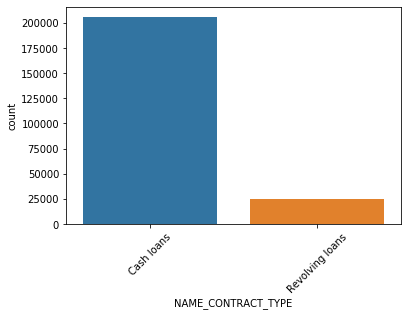

In [58]:
# For NAME_CONTRACT_TYPE
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = tar_0)
plt.xticks(rotation = 45)
plt.show()

> **We can observe that the number of Cash Loans are in comparison with the Revolving Loans, this also implies that there are higher number of Cash Loans which are not defaulted.**

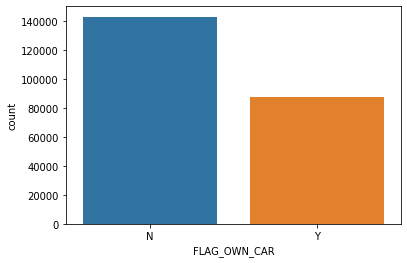

In [59]:
# For FLAG_OWN_CAR
sns.countplot(x = 'FLAG_OWN_CAR', data = tar_0)
plt.show()

> **We can observe that the number of clients who own a car are lower implying that the number of loans which are not in default is higher when the clients do not own a car.**

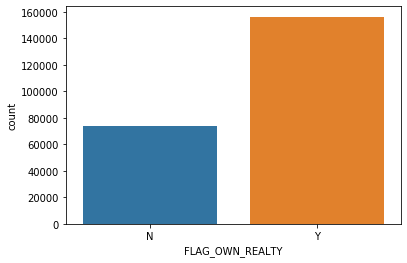

In [60]:
# For FLAG_OWN_REALTY
sns.countplot(x = 'FLAG_OWN_REALTY', data = tar_0)
plt.show()

> **We can observe that the number of clients who own a realty are higher implying that the number of loans which are not in default is higher when the clients own a realty.**

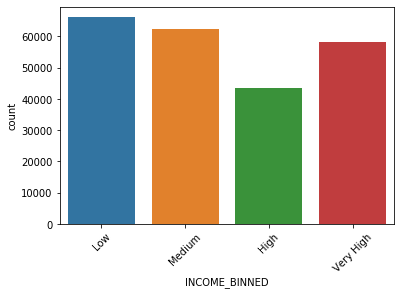

In [61]:
sns.countplot(x = 'INCOME_BINNED', data = tar_0)
plt.xticks(rotation = 45)
plt.show()

> **We can observe that the loans which are applied by clients having a low income are slightly higher. But, there is not much of a difference in the income of the clients except for clients having a High Income, implying that the loans applied by clients having high income are slightly lower.**

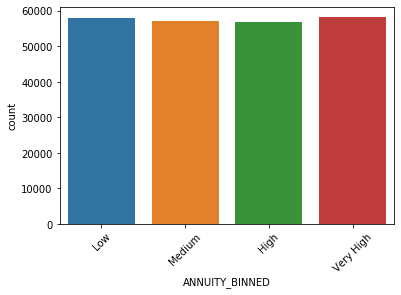

In [62]:
# For ANNUITY_BINNED
sns.countplot(x = 'ANNUITY_BINNED', data = tar_0)
plt.xticks(rotation = 45)
plt.show()

> **We can observe that the Annuity is almost same among all the loans.**

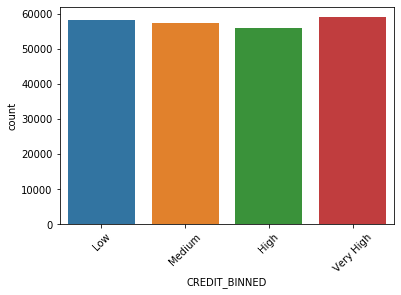

In [63]:
# For CREDIT_BINNED
sns.countplot(x = 'CREDIT_BINNED', data = tar_0)
plt.xticks(rotation = 45)
plt.show()

> **We can observe that the Credit amount of is almost same among all the loans.**

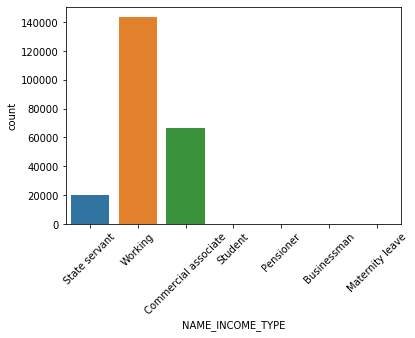

In [64]:
# For NAME_CONTRACT_TYPE
sns.countplot(x = 'NAME_INCOME_TYPE', data = tar_0)
plt.xticks(rotation = 45)
plt.show()

> **We can observe that the loans which belong do the 'Working' Income Type are higher as compared with other Income Types.**

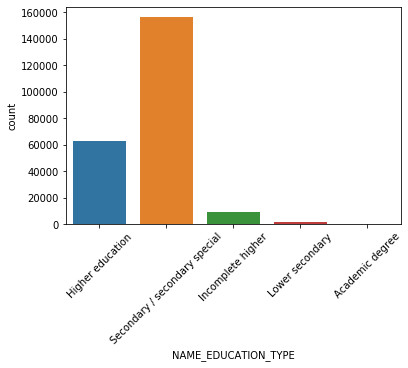

In [65]:
# For NAME_EDUCATION_TYPE
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = tar_0)
plt.xticks(rotation = 45)
plt.show()

> **We can observe that the loans applied by clients who have a Secondary-level of education level are higher.**

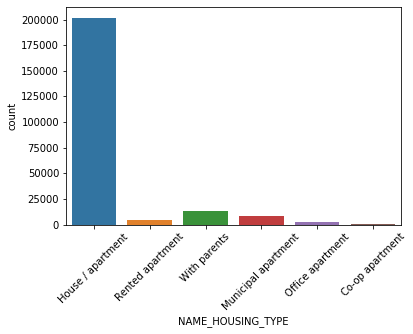

In [66]:
#For NAME_HOUSING_TYPE
sns.countplot(x = 'NAME_HOUSING_TYPE', data = tar_0)
plt.xticks(rotation = 45)
plt.show()

> **We can observe that the loans applied by clients living in their own houses are higher.**

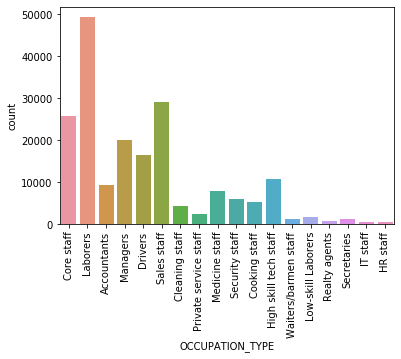

In [67]:
# For OCCUPATION_TYPE
sns.countplot(x = 'OCCUPATION_TYPE', data = tar_0)
plt.xticks(rotation = 90)
plt.show()

> **We can observe that the loans applied by Laborers are higher.**

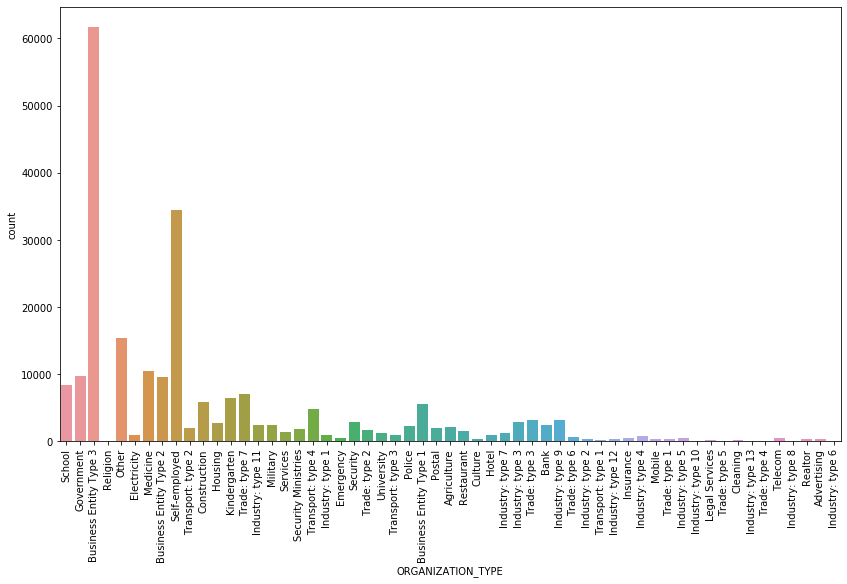

In [68]:
# For ORGANIZATION_TYPE
plt.figure(figsize = (14, 8))
sns.countplot(x = 'ORGANIZATION_TYPE', data = tar_0)
plt.xticks(rotation = 90)
plt.show()

> **We can see that loans applied by clients belonging to the clients belonging to Business Entity Type 3 Organizations are really high in comparison with all the other organizations.**

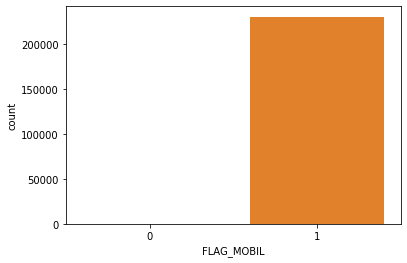

In [69]:
# For FLAG_MOBIL
sns.countplot(x = 'FLAG_MOBIL', data = tar_0)
plt.show()

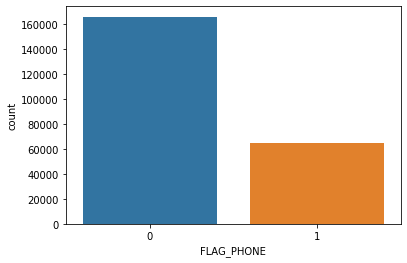

In [70]:
# For FLAG_PHONE
sns.countplot(x = 'FLAG_PHONE', data = tar_0)
plt.show()

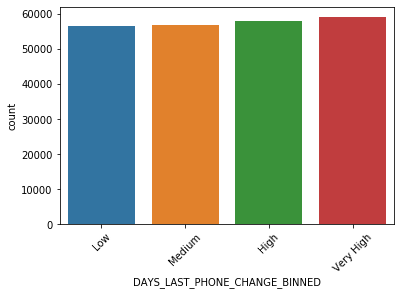

In [71]:
# For DAYS_LAST_PHONE_CHANGE_BINNED
sns.countplot(x = 'DAYS_LAST_PHONE_CHANGE_BINNED', data = tar_0)
plt.xticks(rotation = 45)
plt.show()

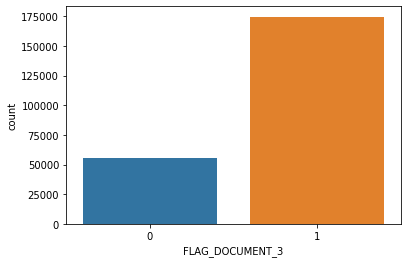

In [72]:
# For FLAG_DOCUMENT_3
sns.countplot(x = 'FLAG_DOCUMENT_3', data = tar_0)
plt.show()

## For the Dataframe - tar_1
This is where the Target is 0, this means non-defaulters.

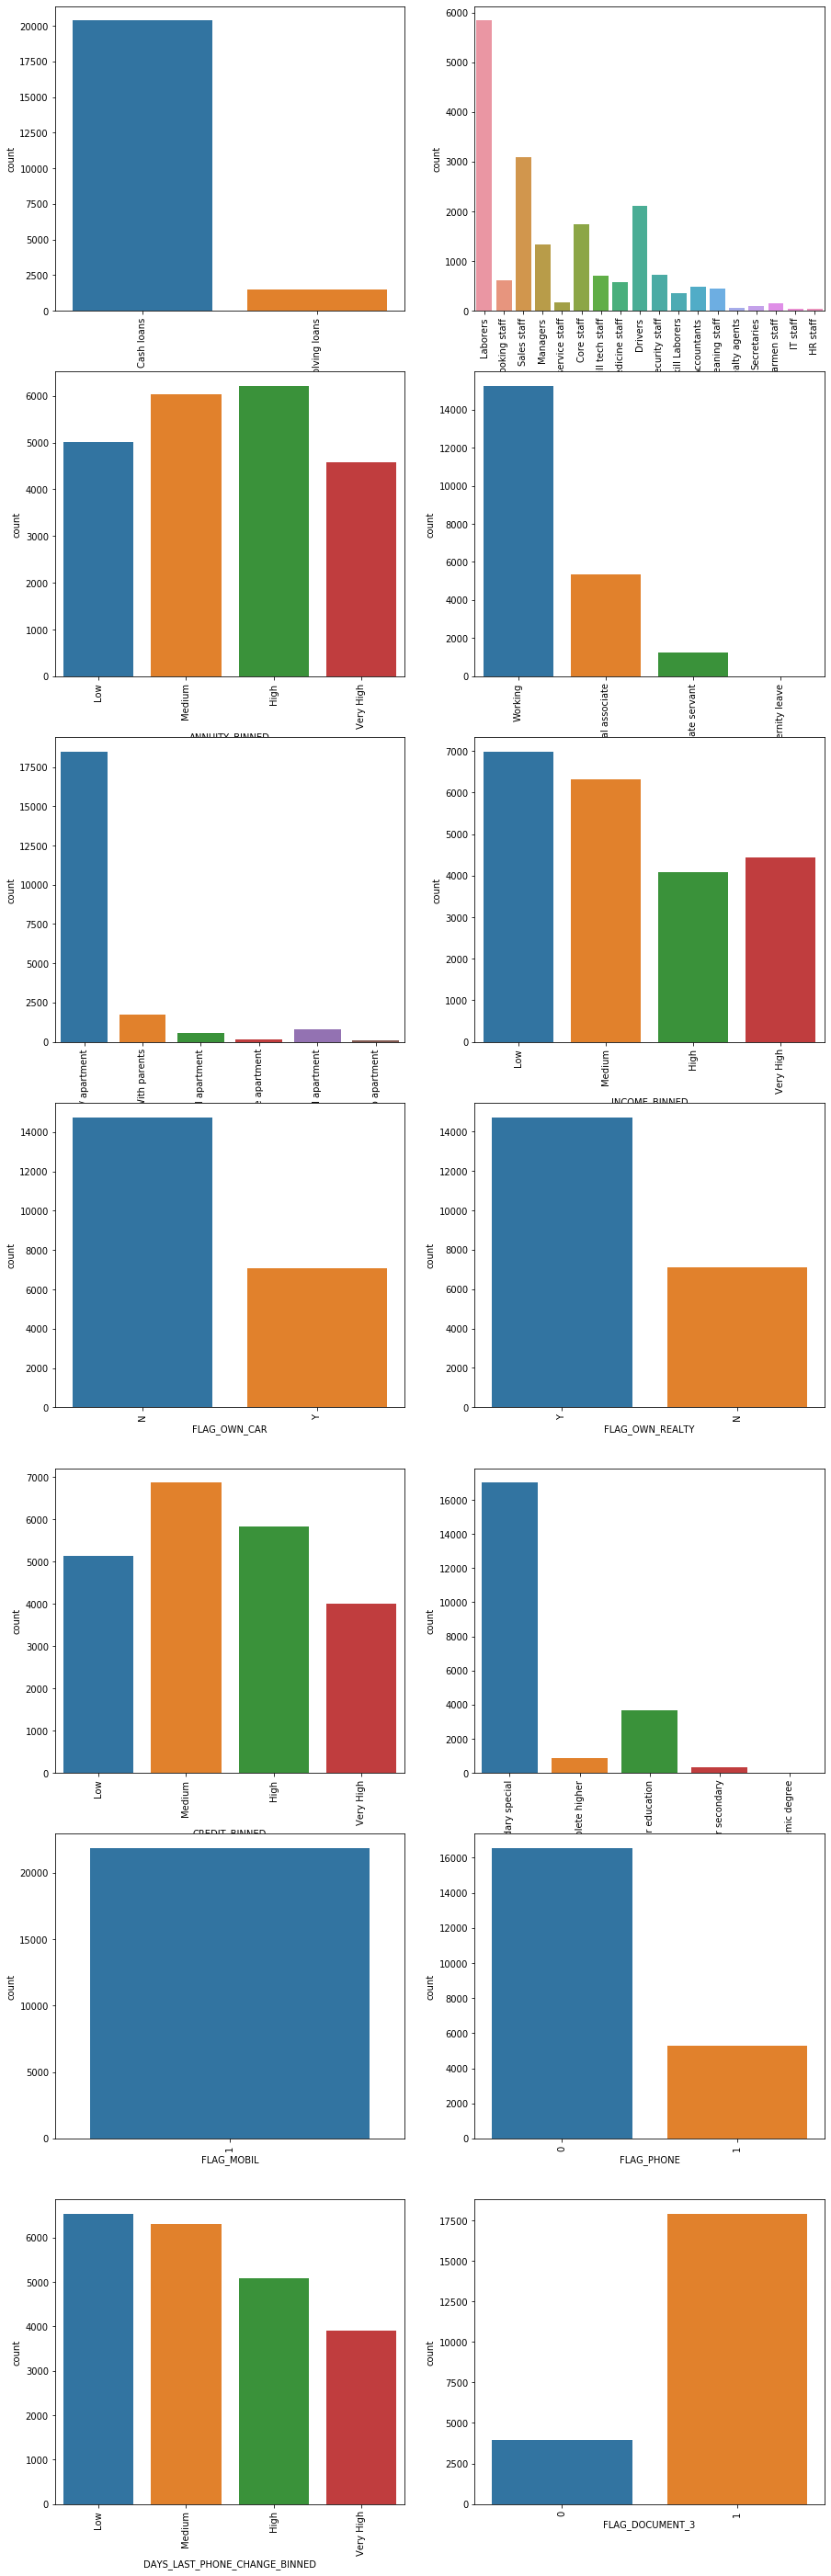

In [73]:
plt.figure(figsize = (15, 50))
features = ['NAME_CONTRACT_TYPE','OCCUPATION_TYPE', 'ANNUITY_BINNED', 'NAME_INCOME_TYPE', 
            'NAME_HOUSING_TYPE', 'INCOME_BINNED','FLAG_OWN_CAR','FLAG_OWN_REALTY','CREDIT_BINNED',
            'NAME_EDUCATION_TYPE','FLAG_MOBIL','FLAG_PHONE','DAYS_LAST_PHONE_CHANGE_BINNED','FLAG_DOCUMENT_3']
for i in enumerate(features):
    plt.subplot(7, 2, i[0]+1)
    sns.countplot(x = i[1], data = tar_1)
    plt.xticks(rotation = 90)

> **We can observe that there is no much difference among the Categories in tar_0 and in tar_1, that is no difference was found in the plotted graphs where the loans are in default and are not in default.**

## Univariate Analysis for Numerical Variables
The numerical variables are:
1. AMT_INCOME_TOTAL
2. AMT_CREDIT
3. AMT_ANNUITY
4. REGION_POPULATION_RELATIVE
5. AGE_IN_YEARS
6. DAYS_EMPLOYED
7. CNT_FAM_MEMBERS
8. REG_REGION_NOT_LIVE_REGION
9. EXT_SOURCE_2
10. EXT_SOURCE_3

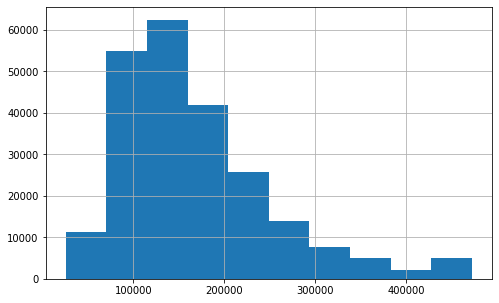

In [74]:
plt.figure(figsize = (8, 5))
tar_0['AMT_INCOME_TOTAL'].hist()
plt.show()

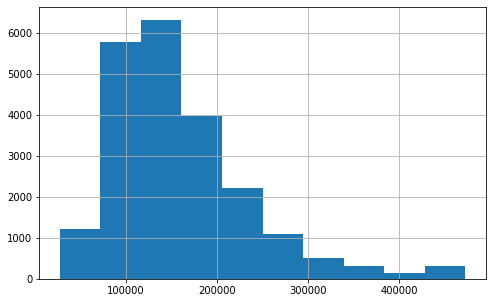

In [75]:
plt.figure(figsize = (8, 5))
tar_1['AMT_INCOME_TOTAL'].hist()
plt.show()

> **We observe that higher number of loans are applied by the clients who have an income between 50,000 to 1,50,000.**
> **There is no difference between between the defaulters and non-defaulters, their income is almost the same.**

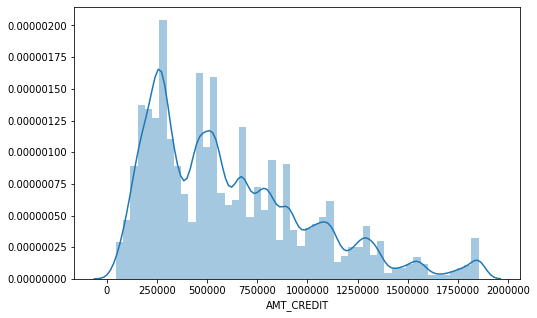

In [76]:
plt.figure(figsize = (8, 5))
sns.distplot(tar_0['AMT_CREDIT'].dropna(), hist = True)
plt.show()

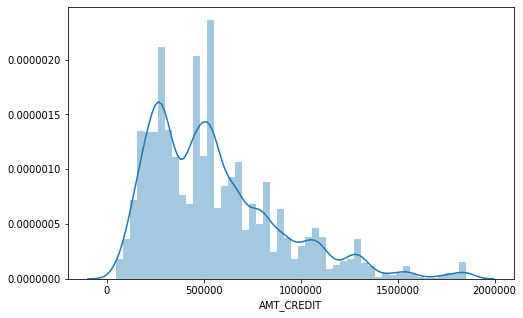

In [77]:
plt.figure(figsize = (8, 5))
sns.distplot(tar_1['AMT_CREDIT'].dropna(), hist = True)
plt.show()

> **We observe that most of the loans have a credit amount between 1,00,000 to 3,00,000.**
> **There is no difference between the defaulters and non-defaulters, their credit amount is almost the same.**

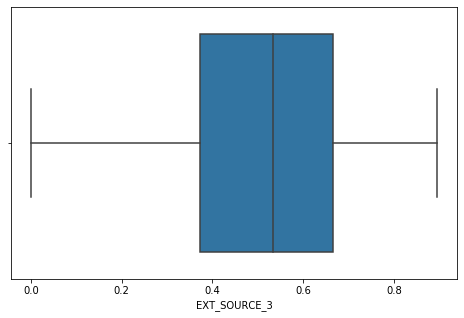

In [78]:
plt.figure(figsize = (8, 5))
sns.boxplot(tar_0.EXT_SOURCE_3)
plt.show()

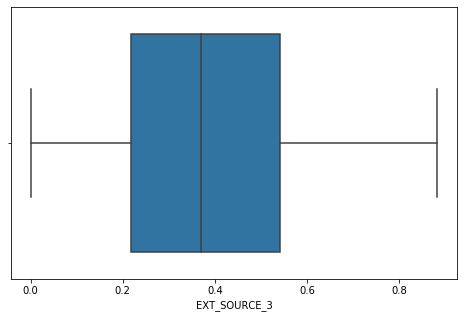

In [79]:
plt.figure(figsize = (8, 5))
sns.boxplot(tar_1.EXT_SOURCE_3)
plt.show()

> **There is no difference between the score of defaulters and non-defaulters, their scores given by an external source is almost the same.**

# Bivariate Analysis

## Continuous - Continuous
### For tar_0

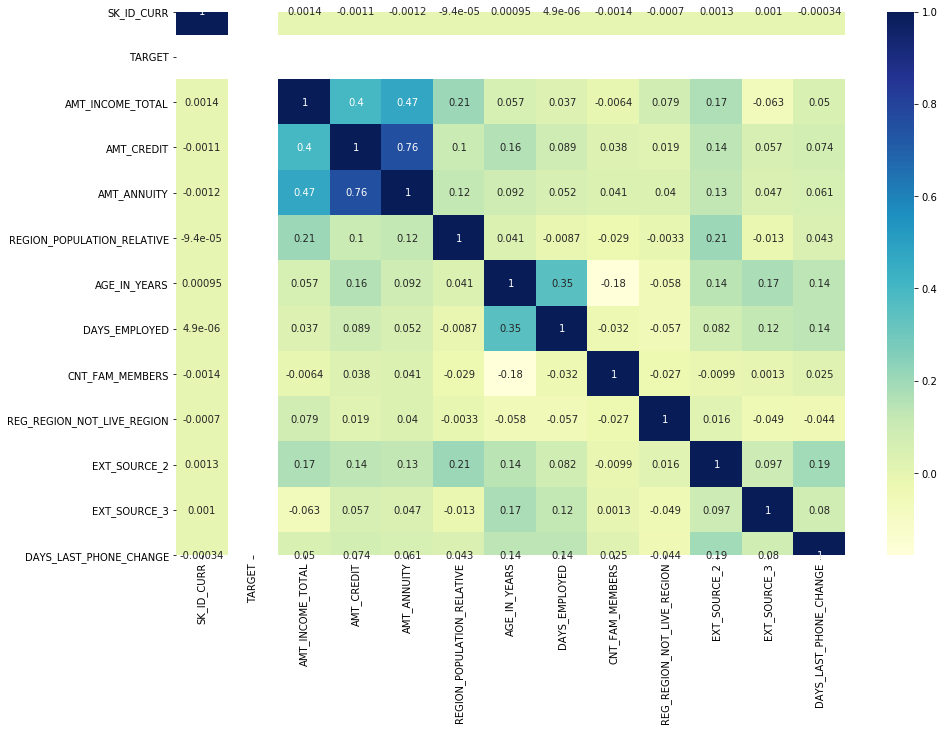

In [80]:
#Continuous variables
#Correlation for Numerical variables 
tar_1['SK_ID_CURR'] = tar_1['SK_ID_CURR'].astype(str)
tar_1['TARGET'] = tar_1['TARGET'].astype(str)

corr_matrix  = tar_0.corr()
plt.figure(figsize=(15,10))

# heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [81]:
## Print the unstacked table version of the correlation matrix
corr_matrix.unstack().reset_index()

level_0                     level_1         0
0                    SK_ID_CURR                  SK_ID_CURR  1.000000
1                    SK_ID_CURR                      TARGET       NaN
2                    SK_ID_CURR            AMT_INCOME_TOTAL  0.001415
3                    SK_ID_CURR                  AMT_CREDIT -0.001105
4                    SK_ID_CURR                 AMT_ANNUITY -0.001183
5                    SK_ID_CURR  REGION_POPULATION_RELATIVE -0.000094
6                    SK_ID_CURR                AGE_IN_YEARS  0.000949
7                    SK_ID_CURR               DAYS_EMPLOYED  0.000005
8                    SK_ID_CURR             CNT_FAM_MEMBERS -0.001387
9                    SK_ID_CURR  REG_REGION_NOT_LIVE_REGION -0.000699
10                   SK_ID_CURR                EXT_SOURCE_2  0.001327
11                   SK_ID_CURR                EXT_SOURCE_3  0.001012
12                   SK_ID_CURR      DAYS_LAST_PHONE_CHANGE -0.000342
13                       TARGET                  SK_ID_CURR       NaN
14                       TARGET                      TARGET       NaN
15                       TARGET            AMT_INCOME_TOTAL       NaN
16                       TARGET                  AMT_CREDIT       NaN
17                       TARGET                 AMT_ANNUITY       NaN
18                       TARGET  REGION_POPULATION_RELATIVE       NaN
19                       TARGET                AGE_IN_YEARS       NaN
20                       TARGET               DAYS_EMPLOYED       NaN
21                       TARGET             CNT_FAM_MEMBERS       NaN
22                       TARGET  REG_REGION_NOT_LIVE_REGION       NaN
23                       TARGET                EXT_SOURCE_2       NaN
24                       TARGET                EXT_SOURCE_3       NaN
25                       TARGET      DAYS_LAST_PHONE_CHANGE       NaN
26             AMT_INCOME_TOTAL                  SK_ID_CURR  0.001415
27             AMT_INCOME_TOTAL                      TARGET       NaN
28             AMT_INCOME_TOTAL            AMT_INCOME_TOTAL  1.000000
29             AMT_INCOME_TOTAL                  AMT_CREDIT  0.398691
30             AMT_INCOME_TOTAL                 AMT_ANNUITY  0.473807
31             AMT_INCOME_TOTAL  REGION_POPULATION_RELATIVE  0.205180
32             AMT_INCOME_TOTAL                AGE_IN_YEARS  0.057132
33             AMT_INCOME_TOTAL               DAYS_EMPLOYED  0.036802
34             AMT_INCOME_TOTAL             CNT_FAM_MEMBERS -0.006372
35             AMT_INCOME_TOTAL  REG_REGION_NOT_LIVE_REGION  0.079389
36             AMT_INCOME_TOTAL                EXT_SOURCE_2  0.171356
37             AMT_INCOME_TOTAL                EXT_SOURCE_3 -0.062983
38             AMT_INCOME_TOTAL      DAYS_LAST_PHONE_CHANGE  0.049759
39                   AMT_CREDIT                  SK_ID_CURR -0.001105
40                   AMT_CREDIT                      TARGET       NaN
41                   AMT_CREDIT            AMT_INCOME_TOTAL  0.398691
42                   AMT_CREDIT                  AMT_CREDIT  1.000000
43                   AMT_CREDIT                 AMT_ANNUITY  0.760099
44                   AMT_CREDIT  REGION_POPULATION_RELATIVE  0.101607
45                   AMT_CREDIT                AGE_IN_YEARS  0.155415
46                   AMT_CREDIT               DAYS_EMPLOYED  0.088951
47                   AMT_CREDIT             CNT_FAM_MEMBERS  0.037615
48                   AMT_CREDIT  REG_REGION_NOT_LIVE_REGION  0.019419
49                   AMT_CREDIT                EXT_SOURCE_2  0.136148
50                   AMT_CREDIT                EXT_SOURCE_3  0.056645
51                   AMT_CREDIT      DAYS_LAST_PHONE_CHANGE  0.074083
52                  AMT_ANNUITY                  SK_ID_CURR -0.001183
53                  AMT_ANNUITY                      TARGET       NaN
54                  AMT_ANNUITY            AMT_INCOME_TOTAL  0.473807
55                  AMT_ANNUITY                  AMT_CREDIT  0.760099
56                  AMT_ANNUITY   

In [82]:
##Taking the boolean values of matrix above k=1 position to avoid duplicate values in correlation matrix
cor_bool = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
cor_bool

SK_ID_CURR  TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                         NaN     NaN          0.001415   -0.001105   
TARGET                             NaN     NaN               NaN         NaN   
AMT_INCOME_TOTAL                   NaN     NaN               NaN    0.398691   
AMT_CREDIT                         NaN     NaN               NaN         NaN   
AMT_ANNUITY                        NaN     NaN               NaN         NaN   
REGION_POPULATION_RELATIVE         NaN     NaN               NaN         NaN   
AGE_IN_YEARS                       NaN     NaN               NaN         NaN   
DAYS_EMPLOYED                      NaN     NaN               NaN         NaN   
CNT_FAM_MEMBERS                    NaN     NaN               NaN         NaN   
REG_REGION_NOT_LIVE_REGION         NaN     NaN               NaN         NaN   
EXT_SOURCE_2                       NaN     NaN               NaN         NaN   
EXT_SOURCE_3                       NaN     NaN               NaN         NaN   
DAYS_LAST_PHONE_CHANGE             NaN     NaN               NaN         NaN   

                            AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                    -0.001183                   -0.000094   
TARGET                              NaN                         NaN   
AMT_INCOME_TOTAL               0.473807                    0.205180   
AMT_CREDIT                     0.760099                    0.101607   
AMT_ANNUITY                         NaN                    0.122223   
REGION_POPULATION_RELATIVE          NaN                         NaN   
AGE_IN_YEARS                        NaN                         NaN   
DAYS_EMPLOYED                       NaN                         NaN   
CNT_FAM_MEMBERS                     NaN                         NaN   
REG_REGION_NOT_LIVE_REGION          NaN                         NaN   
EXT_SOURCE_2                        NaN                         NaN   
EXT_SOURCE_3                        NaN                         NaN   
DAYS_LAST_PHONE_CHANGE              NaN                         NaN   

                            AGE_IN_YEARS  DAYS_EMPLOYED  CNT_FAM_MEMBERS  \
SK_ID_CURR                      0.000949       0.000005        -0.001387   
TARGET                               NaN            NaN              NaN   
AMT_INCOME_TOTAL                0.057132       0.036802        -0.006372   
AMT_CREDIT                      0.155415       0.088951         0.037615   
AMT_ANNUITY                     0.091514       0.052469         0.041226   
REGION_POPULATION_RELATIVE      0.041234      -0.008663        -0.028813   
AGE_IN_YEARS                         NaN       0.352450        -0.178036   
DAYS_EMPLOYED                        NaN            NaN        -0.031523   
CNT_FAM_MEMBERS                      NaN            NaN              NaN   
REG_REGION_NOT_LIVE_REGION           NaN            NaN              NaN   
EXT_SOURCE_2                         NaN            NaN              NaN   
EXT_SOURCE_3                         NaN            NaN              NaN   
DAYS_LAST_PHONE_CHANGE               NaN            NaN              NaN   

                            REG_REGION_NOT_LIVE_REGION  EXT_SOURCE_2  \
SK_ID_CURR                                   -0.000699      0.001327   
TARGET                                             NaN           NaN   
AMT_INCOME_TOTAL                              0.079389      0.171356   
AMT_CREDIT                                    0.019419      0.136148   
AMT_ANNUITY                                   0.039764      0.126985   
REGION_POPULATION_RELATIVE                   -0.003262      0.207116   
AGE_IN_YEARS                                 -0.058378      0.142136   
DAYS_EMPLOYED                                -0.056714      0.081558   
CNT_FAM_MEMBERS                              -0.027397     -0.009935   
REG_REGION_NOT_LIVE_REGION                         NaN      0.015527   
EXT_SOURCE_2                                       NaN 

In [83]:
cor_df = cor_bool.unstack().reset_index()

In [84]:
## Renaming the columns in the unstacked matrix
cor_df.columns = ['VAR_1','VAR_2','Correlation']
cor_df

VAR_1                       VAR_2  Correlation
0                    SK_ID_CURR                  SK_ID_CURR          NaN
1                    SK_ID_CURR                      TARGET          NaN
2                    SK_ID_CURR            AMT_INCOME_TOTAL          NaN
3                    SK_ID_CURR                  AMT_CREDIT          NaN
4                    SK_ID_CURR                 AMT_ANNUITY          NaN
5                    SK_ID_CURR  REGION_POPULATION_RELATIVE          NaN
6                    SK_ID_CURR                AGE_IN_YEARS          NaN
7                    SK_ID_CURR               DAYS_EMPLOYED          NaN
8                    SK_ID_CURR             CNT_FAM_MEMBERS          NaN
9                    SK_ID_CURR  REG_REGION_NOT_LIVE_REGION          NaN
10                   SK_ID_CURR                EXT_SOURCE_2          NaN
11                   SK_ID_CURR                EXT_SOURCE_3          NaN
12                   SK_ID_CURR      DAYS_LAST_PHONE_CHANGE          NaN
13                       TARGET                  SK_ID_CURR          NaN
14                       TARGET                      TARGET          NaN
15                       TARGET            AMT_INCOME_TOTAL          NaN
16                       TARGET                  AMT_CREDIT          NaN
17                       TARGET                 AMT_ANNUITY          NaN
18                       TARGET  REGION_POPULATION_RELATIVE          NaN
19                       TARGET                AGE_IN_YEARS          NaN
20                       TARGET               DAYS_EMPLOYED          NaN
21                       TARGET             CNT_FAM_MEMBERS          NaN
22                       TARGET  REG_REGION_NOT_LIVE_REGION          NaN
23                       TARGET                EXT_SOURCE_2          NaN
24                       TARGET                EXT_SOURCE_3          NaN
25                       TARGET      DAYS_LAST_PHONE_CHANGE          NaN
26             AMT_INCOME_TOTAL                  SK_ID_CURR     0.001415
27             AMT_INCOME_TOTAL                      TARGET          NaN
28             AMT_INCOME_TOTAL            AMT_INCOME_TOTAL          NaN
29             AMT_INCOME_TOTAL                  AMT_CREDIT          NaN
30             AMT_INCOME_TOTAL                 AMT_ANNUITY          NaN
31             AMT_INCOME_TOTAL  REGION_POPULATION_RELATIVE          NaN
32             AMT_INCOME_TOTAL                AGE_IN_YEARS          NaN
33             AMT_INCOME_TOTAL               DAYS_EMPLOYED          NaN
34             AMT_INCOME_TOTAL             CNT_FAM_MEMBERS          NaN
35             AMT_INCOME_TOTAL  REG_REGION_NOT_LIVE_REGION          NaN
36             AMT_INCOME_TOTAL                EXT_SOURCE_2          NaN
37             AMT_INCOME_TOTAL                EXT_SOURCE_3          NaN
38             AMT_INCOME_TOTAL      DAYS_LAST_PHONE_CHANGE          NaN
39                   AMT_CREDIT                  SK_ID_CURR    -0.001105
40                   AMT_CREDIT                      TARGET          NaN
41                   AMT_CREDIT            AMT_INCOME_TOTAL     0.398691
42                   AMT_CREDIT                  AMT_CREDIT          NaN
43                   AMT_CREDIT                 AMT_ANNUITY          NaN
44                   AMT_CREDIT  REGION_POPULATION_RELATIVE          NaN
45                   AMT_CREDIT                AGE_IN_YEARS          NaN
46                   AMT_CREDIT               DAYS_EMPLOYED          NaN
47                   AMT_CREDIT             CNT_FAM_MEMBERS          NaN
48                   AMT_CREDIT  REG_REGION_NOT_LIVE_REGION          NaN
49                   AMT_CREDIT                EXT_SOURCE_2          NaN
50                   AMT_CREDIT                EXT_SOURCE_3          NaN
51                   AMT_CREDIT      DAYS_LAST_PHONE_CHANGE          NaN
52                  AMT_ANNUITY                  SK_ID_CURR    -0.001183
53                  AMT_ANNUITY                      TARGET          NaN
54         

In [85]:
#dropping nan values
cor_df = cor_df.dropna(subset = ['Correlation'])
cor_df.Correlation = abs(cor_df.Correlation)

In [86]:
cor_df.sort_values('Correlation',ascending=False,inplace=True)
cor_df

VAR_1                       VAR_2  Correlation
55                  AMT_ANNUITY                  AMT_CREDIT     0.760099
54                  AMT_ANNUITY            AMT_INCOME_TOTAL     0.473807
41                   AMT_CREDIT            AMT_INCOME_TOTAL     0.398691
97                DAYS_EMPLOYED                AGE_IN_YEARS     0.352450
135                EXT_SOURCE_2  REGION_POPULATION_RELATIVE     0.207116
67   REGION_POPULATION_RELATIVE            AMT_INCOME_TOTAL     0.205180
166      DAYS_LAST_PHONE_CHANGE                EXT_SOURCE_2     0.194059
110             CNT_FAM_MEMBERS                AGE_IN_YEARS     0.178036
149                EXT_SOURCE_3                AGE_IN_YEARS     0.174210
132                EXT_SOURCE_2            AMT_INCOME_TOTAL     0.171356
81                 AGE_IN_YEARS                  AMT_CREDIT     0.155415
136                EXT_SOURCE_2                AGE_IN_YEARS     0.142136
162      DAYS_LAST_PHONE_CHANGE                AGE_IN_YEARS     0.136531
133                EXT_SOURCE_2                  AMT_CREDIT     0.136148
163      DAYS_LAST_PHONE_CHANGE               DAYS_EMPLOYED     0.135750
134                EXT_SOURCE_2                 AMT_ANNUITY     0.126985
69   REGION_POPULATION_RELATIVE                 AMT_ANNUITY     0.122223
150                EXT_SOURCE_3               DAYS_EMPLOYED     0.121417
68   REGION_POPULATION_RELATIVE                  AMT_CREDIT     0.101607
153                EXT_SOURCE_3                EXT_SOURCE_2     0.096897
82                 AGE_IN_YEARS                 AMT_ANNUITY     0.091514
94                DAYS_EMPLOYED                  AMT_CREDIT     0.088951
137                EXT_SOURCE_2               DAYS_EMPLOYED     0.081558
167      DAYS_LAST_PHONE_CHANGE                EXT_SOURCE_3     0.079685
119  REG_REGION_NOT_LIVE_REGION            AMT_INCOME_TOTAL     0.079389
159      DAYS_LAST_PHONE_CHANGE                  AMT_CREDIT     0.074083
145                EXT_SOURCE_3            AMT_INCOME_TOTAL     0.062983
160      DAYS_LAST_PHONE_CHANGE                 AMT_ANNUITY     0.060872
123  REG_REGION_NOT_LIVE_REGION                AGE_IN_YEARS     0.058378
80                 AGE_IN_YEARS            AMT_INCOME_TOTAL     0.057132
124  REG_REGION_NOT_LIVE_REGION               DAYS_EMPLOYED     0.056714
146                EXT_SOURCE_3                  AMT_CREDIT     0.056645
95                DAYS_EMPLOYED                 AMT_ANNUITY     0.052469
158      DAYS_LAST_PHONE_CHANGE            AMT_INCOME_TOTAL     0.049759
152                EXT_SOURCE_3  REG_REGION_NOT_LIVE_REGION     0.049184
147                EXT_SOURCE_3                 AMT_ANNUITY     0.046814
165      DAYS_LAST_PHONE_CHANGE  REG_REGION_NOT_LIVE_REGION     0.043578
161      DAYS_LAST_PHONE_CHANGE  REGION_POPULATION_RELATIVE     0.043368
83                 AGE_IN_YEARS  REGION_POPULATION_RELATIVE     0.041234
108             CNT_FAM_MEMBERS                 AMT_ANNUITY     0.041226
121  REG_REGION_NOT_LIVE_REGION                 AMT_ANNUITY     0.039764
107             CNT_FAM_MEMBERS                  AMT_CREDIT     0.037615
93                DAYS_EMPLOYED            AMT_INCOME_TOTAL     0.036802
111             CNT_FAM_MEMBERS               DAYS_EMPLOYED     0.031523
109             CNT_FAM_MEMBERS  REGION_POPULATION_RELATIVE     0.028813
125  REG_REGION_NOT_LIVE_REGION             CNT_FAM_MEMBERS     0.027397
164      DAYS_LAST_PHONE_CHANGE             CNT_FAM_MEMBERS     0.025366
120  REG_REGION_NOT_LIVE_REGION                  AMT_CREDIT     0.019419
139                EXT_SOURCE_2  REG_REGION_NOT_LIVE_REGION     0.015527
148                EXT_SOURCE_3  REGION_POPULATION_RELATIVE     0.013429
138                EXT_SOURCE_2             CNT_FAM_MEMBERS     0.009935
96                DAYS_EMPLOYED  REGION_POPULATION_RELATIVE     0.008663
106             CNT_FAM_MEMBERS            AMT_INCOME_TOTAL     0.006372
122  REG_REGION_NOT_LIVE_REGION  REGION_POPULATION_RELATIVE     0.003262
26         

### For tar_1

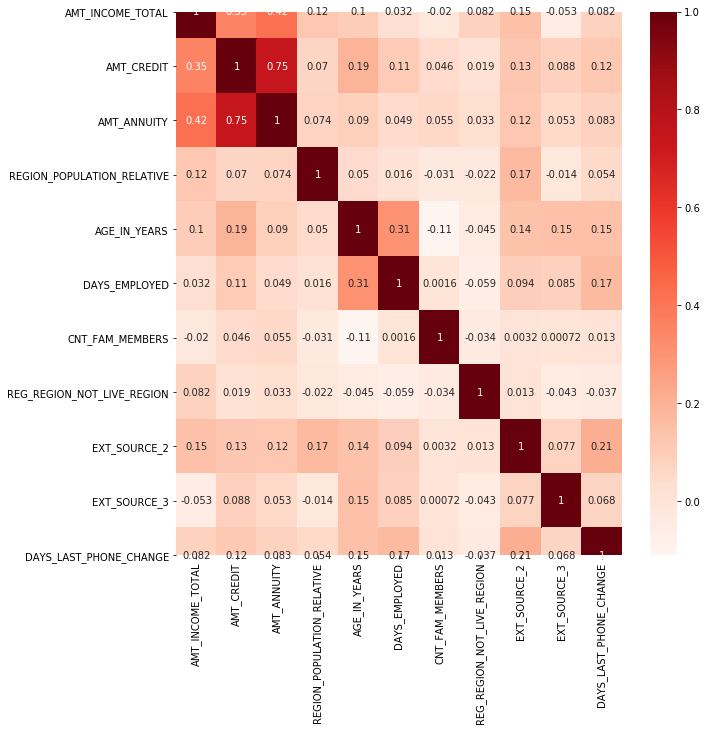

In [87]:
#Continuous variables
#Correlation for Numerical variables
tar_1['SK_ID_CURR'] = tar_1['SK_ID_CURR'].astype(str)
tar_1['TARGET'] = tar_1['TARGET'].astype(str)

cor = tar_1.corr()
plt.figure(figsize=(10,10))

# heatmap
sns.heatmap(cor, cmap="Reds", annot=True)
plt.show()

In [88]:
## Print the unstacked table version of the correlation matrix
cor.unstack().reset_index()

level_0                     level_1         0
0              AMT_INCOME_TOTAL            AMT_INCOME_TOTAL  1.000000
1              AMT_INCOME_TOTAL                  AMT_CREDIT  0.353931
2              AMT_INCOME_TOTAL                 AMT_ANNUITY  0.424363
3              AMT_INCOME_TOTAL  REGION_POPULATION_RELATIVE  0.123563
4              AMT_INCOME_TOTAL                AGE_IN_YEARS  0.101474
5              AMT_INCOME_TOTAL               DAYS_EMPLOYED  0.031816
6              AMT_INCOME_TOTAL             CNT_FAM_MEMBERS -0.020306
7              AMT_INCOME_TOTAL  REG_REGION_NOT_LIVE_REGION  0.082123
8              AMT_INCOME_TOTAL                EXT_SOURCE_2  0.148663
9              AMT_INCOME_TOTAL                EXT_SOURCE_3 -0.053191
10             AMT_INCOME_TOTAL      DAYS_LAST_PHONE_CHANGE  0.081722
11                   AMT_CREDIT            AMT_INCOME_TOTAL  0.353931
12                   AMT_CREDIT                  AMT_CREDIT  1.000000
13                   AMT_CREDIT                 AMT_ANNUITY  0.748359
14                   AMT_CREDIT  REGION_POPULATION_RELATIVE  0.070034
15                   AMT_CREDIT                AGE_IN_YEARS  0.190770
16                   AMT_CREDIT               DAYS_EMPLOYED  0.107965
17                   AMT_CREDIT             CNT_FAM_MEMBERS  0.046423
18                   AMT_CREDIT  REG_REGION_NOT_LIVE_REGION  0.019305
19                   AMT_CREDIT                EXT_SOURCE_2  0.126972
20                   AMT_CREDIT                EXT_SOURCE_3  0.088004
21                   AMT_CREDIT      DAYS_LAST_PHONE_CHANGE  0.118171
22                  AMT_ANNUITY            AMT_INCOME_TOTAL  0.424363
23                  AMT_ANNUITY                  AMT_CREDIT  0.748359
24                  AMT_ANNUITY                 AMT_ANNUITY  1.000000
25                  AMT_ANNUITY  REGION_POPULATION_RELATIVE  0.074406
26                  AMT_ANNUITY                AGE_IN_YEARS  0.090212
27                  AMT_ANNUITY               DAYS_EMPLOYED  0.049032
28                  AMT_ANNUITY             CNT_FAM_MEMBERS  0.054884
29                  AMT_ANNUITY  REG_REGION_NOT_LIVE_REGION  0.033311
30                  AMT_ANNUITY                EXT_SOURCE_2  0.120642
31                  AMT_ANNUITY                EXT_SOURCE_3  0.052896
32                  AMT_ANNUITY      DAYS_LAST_PHONE_CHANGE  0.083159
33   REGION_POPULATION_RELATIVE            AMT_INCOME_TOTAL  0.123563
34   REGION_POPULATION_RELATIVE                  AMT_CREDIT  0.070034
35   REGION_POPULATION_RELATIVE                 AMT_ANNUITY  0.074406
36   REGION_POPULATION_RELATIVE  REGION_POPULATION_RELATIVE  1.000000
37   REGION_POPULATION_RELATIVE                AGE_IN_YEARS  0.049706
38   REGION_POPULATION_RELATIVE               DAYS_EMPLOYED  0.015758
39   REGION_POPULATION_RELATIVE             CNT_FAM_MEMBERS -0.030847
40   REGION_POPULATION_RELATIVE  REG_REGION_NOT_LIVE_REGION -0.021946
41   REGION_POPULATION_RELATIVE                EXT_SOURCE_2  0.170162
42   REGION_POPULATION_RELATIVE                EXT_SOURCE_3 -0.013677
43   REGION_POPULATION_RELATIVE      DAYS_LAST_PHONE_CHANGE  0.054281
44                 AGE_IN_YEARS            AMT_INCOME_TOTAL  0.101474
45                 AGE_IN_YEARS                  AMT_CREDIT  0.190770
46                 AGE_IN_YEARS                 AMT_ANNUITY  0.090212
47                 AGE_IN_YEARS  REGION_POPULATION_RELATIVE  0.049706
48                 AGE_IN_YEARS                AGE_IN_YEARS  1.000000
49                 AGE_IN_YEARS               DAYS_EMPLOYED  0.306726
50                 AGE_IN_YEARS             CNT_FAM_MEMBERS -0.110469
51                 AGE_IN_YEARS  REG_REGION_NOT_LIVE_REGION -0.044556
52                 AGE_IN_YEARS                EXT_SOURCE_2  0.142550
53                 AGE_IN_YEARS                EXT_SOURCE_3  0.146112
54                 AGE_IN_YEARS      DAYS_LAST_PHONE_CHANGE  0.147100
55                DAYS_EMPLOYED            AMT_INCOME_TOTAL  0.031816
56                DAYS_EMPLOYED   

In [89]:
##Taking the boolean values of matrix above k=1 position to avoid duplicate values in correlation matrix
cor_bool = cor.where(np.triu(np.ones(cor.shape),k=1).astype(np.bool))
cor_bool

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                         NaN    0.353931     0.424363   
AMT_CREDIT                               NaN         NaN     0.748359   
AMT_ANNUITY                              NaN         NaN          NaN   
REGION_POPULATION_RELATIVE               NaN         NaN          NaN   
AGE_IN_YEARS                             NaN         NaN          NaN   
DAYS_EMPLOYED                            NaN         NaN          NaN   
CNT_FAM_MEMBERS                          NaN         NaN          NaN   
REG_REGION_NOT_LIVE_REGION               NaN         NaN          NaN   
EXT_SOURCE_2                             NaN         NaN          NaN   
EXT_SOURCE_3                             NaN         NaN          NaN   
DAYS_LAST_PHONE_CHANGE                   NaN         NaN          NaN   

                            REGION_POPULATION_RELATIVE  AGE_IN_YEARS  \
AMT_INCOME_TOTAL                              0.123563      0.101474   
AMT_CREDIT                                    0.070034      0.190770   
AMT_ANNUITY                                   0.074406      0.090212   
REGION_POPULATION_RELATIVE                         NaN      0.049706   
AGE_IN_YEARS                                       NaN           NaN   
DAYS_EMPLOYED                                      NaN           NaN   
CNT_FAM_MEMBERS                                    NaN           NaN   
REG_REGION_NOT_LIVE_REGION                         NaN           NaN   
EXT_SOURCE_2                                       NaN           NaN   
EXT_SOURCE_3                                       NaN           NaN   
DAYS_LAST_PHONE_CHANGE                             NaN           NaN   

                            DAYS_EMPLOYED  CNT_FAM_MEMBERS  \
AMT_INCOME_TOTAL                 0.031816        -0.020306   
AMT_CREDIT                       0.107965         0.046423   
AMT_ANNUITY                      0.049032         0.054884   
REGION_POPULATION_RELATIVE       0.015758        -0.030847   
AGE_IN_YEARS                     0.306726        -0.110469   
DAYS_EMPLOYED                         NaN         0.001630   
CNT_FAM_MEMBERS                       NaN              NaN   
REG_REGION_NOT_LIVE_REGION            NaN              NaN   
EXT_SOURCE_2                          NaN              NaN   
EXT_SOURCE_3                          NaN              NaN   
DAYS_LAST_PHONE_CHANGE                NaN              NaN   

                            REG_REGION_NOT_LIVE_REGION  EXT_SOURCE_2  \
AMT_INCOME_TOTAL                              0.082123      0.148663   
AMT_CREDIT                                    0.019305      0.126972   
AMT_ANNUITY                                   0.033311      0.120642   
REGION_POPULATION_RELATIVE                   -0.021946      0.170162   
AGE_IN_YEARS                                 -0.044556      0.142550   
DAYS_EMPLOYED                                -0.059212      0.094249   
CNT_FAM_MEMBERS                              -0.034419      0.003175   
REG_REGION_NOT_LIVE_REGION                         NaN      0.013417   
EXT_SOURCE_2                                       NaN           NaN   
EXT_SOURCE_3                                       NaN           NaN   
DAYS_LAST_PHONE_CHANGE                             NaN           NaN   

                            EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  
AMT_INCOME_TOTAL               -0.053191                0.081722  
AMT_CREDIT                      0.088004                0.118171  
AMT_ANNUITY                     0.052896                0.083159  
REGION_POPULATION_RELATIVE     -0.013677                0.054281  
AGE_IN_YEARS                    0.146112                0.147100  
DAYS_EMPLOYED                   0.085475                0.169963  
CNT_FAM_MEMBERS                 0.000717                0.013190  
REG_REGION_NOT_LIVE_REGION     -0.042709               -0.036877  
EXT_SOURCE_2                    0.076992                0.210686  
EXT_SO

In [90]:
cor_df = cor_bool.unstack().reset_index()

In [91]:
## Renaming the columns in the unstacked matrix
cor_df.columns = ['VAR_1','VAR_2','Correlation']
cor_df

VAR_1                       VAR_2  Correlation
0              AMT_INCOME_TOTAL            AMT_INCOME_TOTAL          NaN
1              AMT_INCOME_TOTAL                  AMT_CREDIT          NaN
2              AMT_INCOME_TOTAL                 AMT_ANNUITY          NaN
3              AMT_INCOME_TOTAL  REGION_POPULATION_RELATIVE          NaN
4              AMT_INCOME_TOTAL                AGE_IN_YEARS          NaN
5              AMT_INCOME_TOTAL               DAYS_EMPLOYED          NaN
6              AMT_INCOME_TOTAL             CNT_FAM_MEMBERS          NaN
7              AMT_INCOME_TOTAL  REG_REGION_NOT_LIVE_REGION          NaN
8              AMT_INCOME_TOTAL                EXT_SOURCE_2          NaN
9              AMT_INCOME_TOTAL                EXT_SOURCE_3          NaN
10             AMT_INCOME_TOTAL      DAYS_LAST_PHONE_CHANGE          NaN
11                   AMT_CREDIT            AMT_INCOME_TOTAL     0.353931
12                   AMT_CREDIT                  AMT_CREDIT          NaN
13                   AMT_CREDIT                 AMT_ANNUITY          NaN
14                   AMT_CREDIT  REGION_POPULATION_RELATIVE          NaN
15                   AMT_CREDIT                AGE_IN_YEARS          NaN
16                   AMT_CREDIT               DAYS_EMPLOYED          NaN
17                   AMT_CREDIT             CNT_FAM_MEMBERS          NaN
18                   AMT_CREDIT  REG_REGION_NOT_LIVE_REGION          NaN
19                   AMT_CREDIT                EXT_SOURCE_2          NaN
20                   AMT_CREDIT                EXT_SOURCE_3          NaN
21                   AMT_CREDIT      DAYS_LAST_PHONE_CHANGE          NaN
22                  AMT_ANNUITY            AMT_INCOME_TOTAL     0.424363
23                  AMT_ANNUITY                  AMT_CREDIT     0.748359
24                  AMT_ANNUITY                 AMT_ANNUITY          NaN
25                  AMT_ANNUITY  REGION_POPULATION_RELATIVE          NaN
26                  AMT_ANNUITY                AGE_IN_YEARS          NaN
27                  AMT_ANNUITY               DAYS_EMPLOYED          NaN
28                  AMT_ANNUITY             CNT_FAM_MEMBERS          NaN
29                  AMT_ANNUITY  REG_REGION_NOT_LIVE_REGION          NaN
30                  AMT_ANNUITY                EXT_SOURCE_2          NaN
31                  AMT_ANNUITY                EXT_SOURCE_3          NaN
32                  AMT_ANNUITY      DAYS_LAST_PHONE_CHANGE          NaN
33   REGION_POPULATION_RELATIVE            AMT_INCOME_TOTAL     0.123563
34   REGION_POPULATION_RELATIVE                  AMT_CREDIT     0.070034
35   REGION_POPULATION_RELATIVE                 AMT_ANNUITY     0.074406
36   REGION_POPULATION_RELATIVE  REGION_POPULATION_RELATIVE          NaN
37   REGION_POPULATION_RELATIVE                AGE_IN_YEARS          NaN
38   REGION_POPULATION_RELATIVE               DAYS_EMPLOYED          NaN
39   REGION_POPULATION_RELATIVE             CNT_FAM_MEMBERS          NaN
40   REGION_POPULATION_RELATIVE  REG_REGION_NOT_LIVE_REGION          NaN
41   REGION_POPULATION_RELATIVE                EXT_SOURCE_2          NaN
42   REGION_POPULATION_RELATIVE                EXT_SOURCE_3          NaN
43   REGION_POPULATION_RELATIVE      DAYS_LAST_PHONE_CHANGE          NaN
44                 AGE_IN_YEARS            AMT_INCOME_TOTAL     0.101474
45                 AGE_IN_YEARS                  AMT_CREDIT     0.190770
46                 AGE_IN_YEARS                 AMT_ANNUITY     0.090212
47                 AGE_IN_YEARS  REGION_POPULATION_RELATIVE     0.049706
48                 AGE_IN_YEARS                AGE_IN_YEARS          NaN
49                 AGE_IN_YEARS               DAYS_EMPLOYED          NaN
50                 AGE_IN_YEARS             CNT_FAM_MEMBERS          NaN
51                 AGE_IN_YEARS  REG_REGION_NOT_LIVE_REGION          NaN
52                 AGE_IN_YEARS                EXT_SOURCE_2          NaN
53                 AGE_IN_YEARS                EXT_SOURCE_3          NaN
54         

In [92]:
#dropping nan values
cor_df = cor_df.dropna(subset = ['Correlation'])
cor_df.Correlation = abs(cor_df.Correlation)

In [93]:
cor_df.sort_values('Correlation',ascending=False,inplace=True)
cor_df

VAR_1                       VAR_2  Correlation
23                  AMT_ANNUITY                  AMT_CREDIT     0.748359
22                  AMT_ANNUITY            AMT_INCOME_TOTAL     0.424363
11                   AMT_CREDIT            AMT_INCOME_TOTAL     0.353931
59                DAYS_EMPLOYED                AGE_IN_YEARS     0.306726
118      DAYS_LAST_PHONE_CHANGE                EXT_SOURCE_2     0.210686
45                 AGE_IN_YEARS                  AMT_CREDIT     0.190770
91                 EXT_SOURCE_2  REGION_POPULATION_RELATIVE     0.170162
115      DAYS_LAST_PHONE_CHANGE               DAYS_EMPLOYED     0.169963
88                 EXT_SOURCE_2            AMT_INCOME_TOTAL     0.148663
114      DAYS_LAST_PHONE_CHANGE                AGE_IN_YEARS     0.147100
103                EXT_SOURCE_3                AGE_IN_YEARS     0.146112
92                 EXT_SOURCE_2                AGE_IN_YEARS     0.142550
89                 EXT_SOURCE_2                  AMT_CREDIT     0.126972
33   REGION_POPULATION_RELATIVE            AMT_INCOME_TOTAL     0.123563
90                 EXT_SOURCE_2                 AMT_ANNUITY     0.120642
111      DAYS_LAST_PHONE_CHANGE                  AMT_CREDIT     0.118171
70              CNT_FAM_MEMBERS                AGE_IN_YEARS     0.110469
56                DAYS_EMPLOYED                  AMT_CREDIT     0.107965
44                 AGE_IN_YEARS            AMT_INCOME_TOTAL     0.101474
93                 EXT_SOURCE_2               DAYS_EMPLOYED     0.094249
46                 AGE_IN_YEARS                 AMT_ANNUITY     0.090212
100                EXT_SOURCE_3                  AMT_CREDIT     0.088004
104                EXT_SOURCE_3               DAYS_EMPLOYED     0.085475
112      DAYS_LAST_PHONE_CHANGE                 AMT_ANNUITY     0.083159
77   REG_REGION_NOT_LIVE_REGION            AMT_INCOME_TOTAL     0.082123
110      DAYS_LAST_PHONE_CHANGE            AMT_INCOME_TOTAL     0.081722
107                EXT_SOURCE_3                EXT_SOURCE_2     0.076992
35   REGION_POPULATION_RELATIVE                 AMT_ANNUITY     0.074406
34   REGION_POPULATION_RELATIVE                  AMT_CREDIT     0.070034
119      DAYS_LAST_PHONE_CHANGE                EXT_SOURCE_3     0.068276
82   REG_REGION_NOT_LIVE_REGION               DAYS_EMPLOYED     0.059212
68              CNT_FAM_MEMBERS                 AMT_ANNUITY     0.054884
113      DAYS_LAST_PHONE_CHANGE  REGION_POPULATION_RELATIVE     0.054281
99                 EXT_SOURCE_3            AMT_INCOME_TOTAL     0.053191
101                EXT_SOURCE_3                 AMT_ANNUITY     0.052896
47                 AGE_IN_YEARS  REGION_POPULATION_RELATIVE     0.049706
57                DAYS_EMPLOYED                 AMT_ANNUITY     0.049032
67              CNT_FAM_MEMBERS                  AMT_CREDIT     0.046423
81   REG_REGION_NOT_LIVE_REGION                AGE_IN_YEARS     0.044556
106                EXT_SOURCE_3  REG_REGION_NOT_LIVE_REGION     0.042709
117      DAYS_LAST_PHONE_CHANGE  REG_REGION_NOT_LIVE_REGION     0.036877
83   REG_REGION_NOT_LIVE_REGION             CNT_FAM_MEMBERS     0.034419
79   REG_REGION_NOT_LIVE_REGION                 AMT_ANNUITY     0.033311
55                DAYS_EMPLOYED            AMT_INCOME_TOTAL     0.031816
69              CNT_FAM_MEMBERS  REGION_POPULATION_RELATIVE     0.030847
80   REG_REGION_NOT_LIVE_REGION  REGION_POPULATION_RELATIVE     0.021946
66              CNT_FAM_MEMBERS            AMT_INCOME_TOTAL     0.020306
78   REG_REGION_NOT_LIVE_REGION                  AMT_CREDIT     0.019305
58                DAYS_EMPLOYED  REGION_POPULATION_RELATIVE     0.015758
102                EXT_SOURCE_3  REGION_POPULATION_RELATIVE     0.013677
95                 EXT_SOURCE_2  REG_REGION_NOT_LIVE_REGION     0.013417
116      DAYS_LAST_PHONE_CHANGE             CNT_FAM_MEMBERS     0.013190
94                 EXT_SOURCE_2             CNT_FAM_MEMBERS     0.003175
71              CNT_FAM_MEMBERS               DAYS_EMPLOYED     0.001630
105        

## Top 10 Columns with High Correlation

We observe that the Top 10 Correlated Columns in tar_0 are:
1. **AMT_ANNUITY** and **AMT_CREDIT** - **75%**
2. **AMT_ANNUITY** and **AMT_TOTAL_INCOME** - **42%**
3. **AMT_CREDIT** and **AMT_TOTAL_INCOME** - **35%**
4. **AGE_IN_YEARS** and **DAYS_EMPLOYED** - **31%**
5. **DAYS_LAST_PHONE_CHANGE** and **EXT_SOURCE_2** - **21%**
6. **AGE_IN_YEARS** and **AMT_CREDIT** - **19%**
7. **REGION_POPULATION_RELATIVE** and **EXT_SOURCE_2** - **17%**
8. **AGE_IN_YEARS** and **EXT_SOURCE_3** - **15%**
9. **EXT_SOURCE_2** and **AMT_CREDIT** - **13%**
10. **EXT_SOURCE_2** and **AMT_ANNUITY** - **12%**

We observe that the Top 10 Correlated Columns in tar_1 are:
1. **AMT_ANNUITY** and **AMT_CREDIT** - **75%**
2. **AMT_ANNUITY** and **AMT_TOTAL_INCOME** - **42%**
3. **AMT_CREDIT** and **AMT_TOTAL_INCOME** - **35%**
4. **AGE_IN_YEARS** and **DAYS_EMPLOYED** - **31%**
5. **DAYS_LAST_PHONE_CHANGE** and **EXT_SOURCE_2** - **21%**
6. **AGE_IN_YEARS** and **AMT_CREDIT** - **19%**
7. **REGION_POPULATION_RELATIVE** and **EXT_SOURCE_2** - **17%**
8. **AGE_IN_YEARS** and **EXT_SOURCE_3** - **15%**
9. **EXT_SOURCE_2** and **AMT_CREDIT** - **13%**
10. **EXT_SOURCE_2** and **AMT_ANNUITY** - **12%**

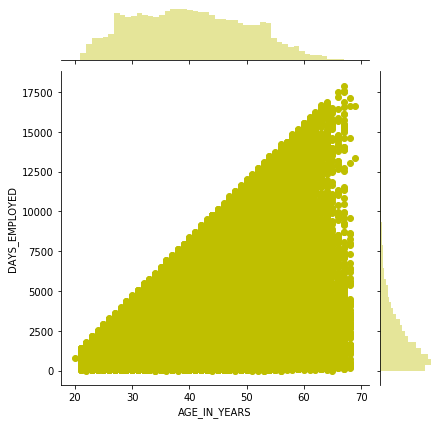

In [94]:
#For tar_0
sns.jointplot('AGE_IN_YEARS','DAYS_EMPLOYED', tar_0, color="y")
plt.show()

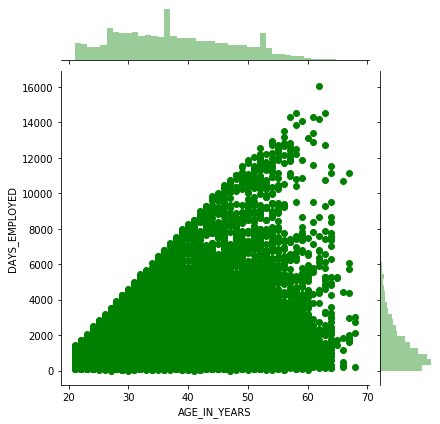

In [95]:
#For tar_1
sns.jointplot('AGE_IN_YEARS','DAYS_EMPLOYED', tar_1, color="g")
plt.show()

## Categorical - Categorical
### For tar_0

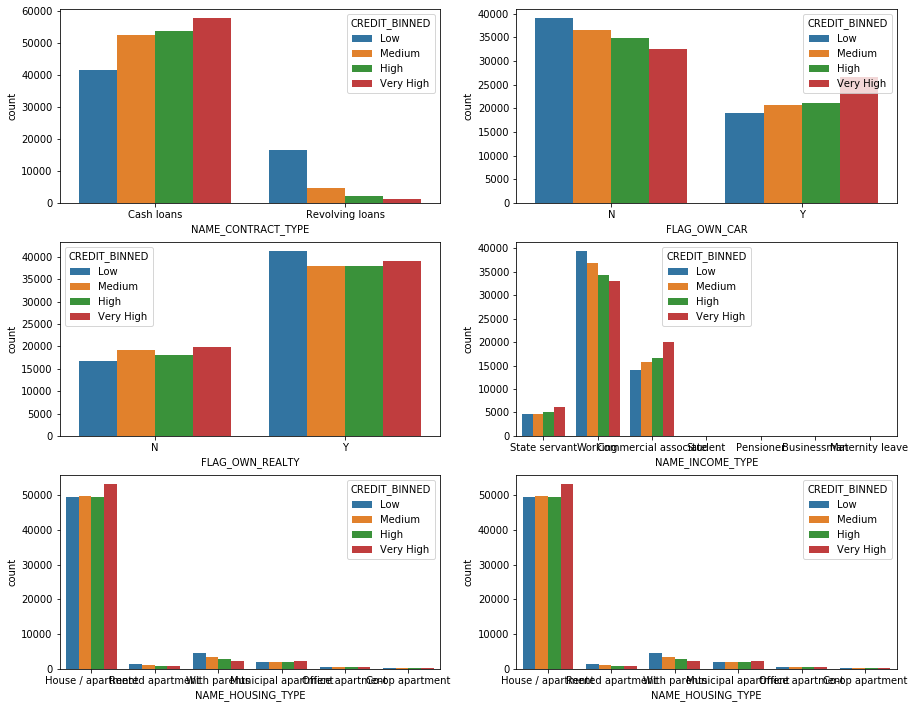

In [96]:
features = ['NAME_CONTRACT_TYPE','FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
            'NAME_INCOME_TYPE','NAME_HOUSING_TYPE','NAME_HOUSING_TYPE']

plt.figure(figsize=(15,25))

for i in enumerate(features):
    plt.subplot(6,2,i[0]+1)
    sns.countplot(x=i[1], hue = 'CREDIT_BINNED', data = tar_0)

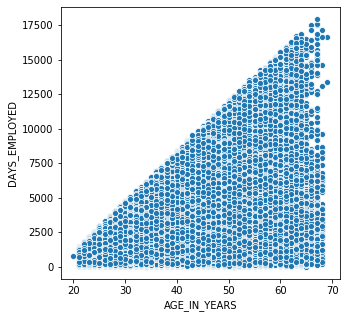

In [97]:
plt.figure(figsize=(5,5))
sns.scatterplot('AGE_IN_YEARS','DAYS_EMPLOYED',data=tar_0)

### For tar_1

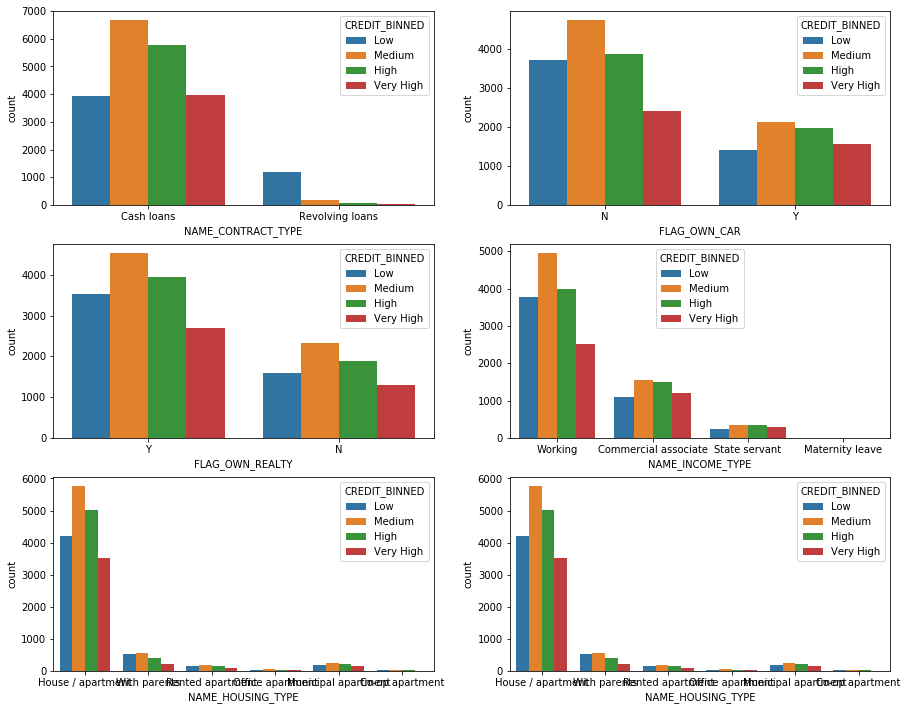

In [98]:
features = ['NAME_CONTRACT_TYPE','FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
            'NAME_INCOME_TYPE','NAME_HOUSING_TYPE','NAME_HOUSING_TYPE']

plt.figure(figsize=(15,25))
plt.xticks(rotation = 90)
for i in enumerate(features):
    plt.subplot(6,2,i[0]+1)
    sns.countplot(x=i[1], hue = 'CREDIT_BINNED', data = tar_1)

## Continuous - Categorical
### For tar_0

<Figure size 720x1440 with 0 Axes>

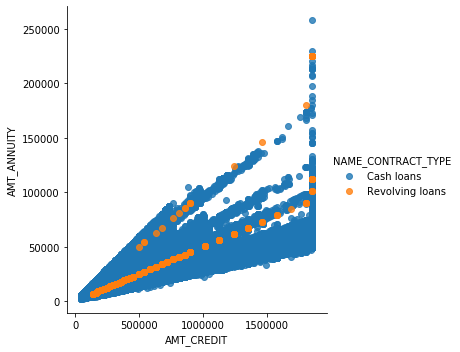

In [99]:
plt.figure(figsize=(10,20))
sns.lmplot('AMT_CREDIT', 'AMT_ANNUITY', data=tar_0, hue = 'NAME_CONTRACT_TYPE', fit_reg = False)

<Figure size 720x720 with 0 Axes>

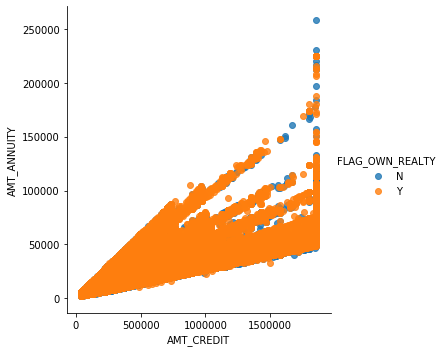

In [100]:
plt.figure(figsize=(10,10))
sns.lmplot('AMT_CREDIT', 'AMT_ANNUITY', data=tar_0, hue = 'FLAG_OWN_REALTY', fit_reg = False)

### For tar_1

<Figure size 720x1440 with 0 Axes>

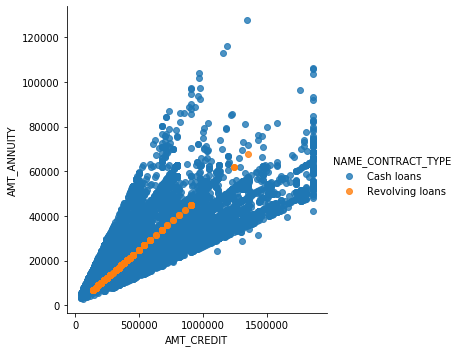

In [101]:
plt.figure(figsize=(10,20))
sns.lmplot('AMT_CREDIT', 'AMT_ANNUITY', data=tar_1, hue = 'NAME_CONTRACT_TYPE', fit_reg = False)

<Figure size 720x720 with 0 Axes>

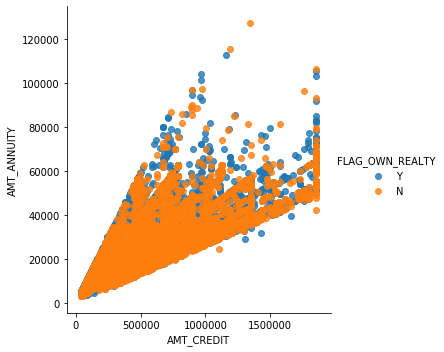

In [102]:
plt.figure(figsize=(10,10))
sns.lmplot('AMT_CREDIT', 'AMT_ANNUITY', data=tar_1, hue = 'FLAG_OWN_REALTY', fit_reg = False)

## Multivariate Analysis
### For tar_0

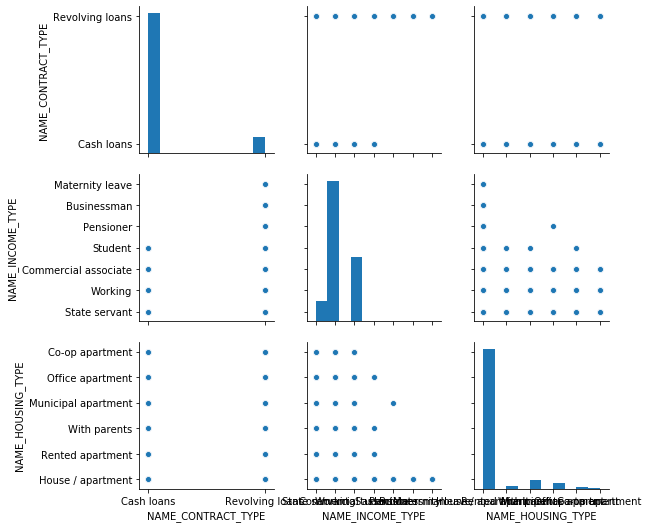

In [103]:
#plot the pair plot for categotical variables
sns.pairplot(data=tar_0,vars=['NAME_CONTRACT_TYPE','NAME_INCOME_TYPE','NAME_HOUSING_TYPE'])
plt.show()

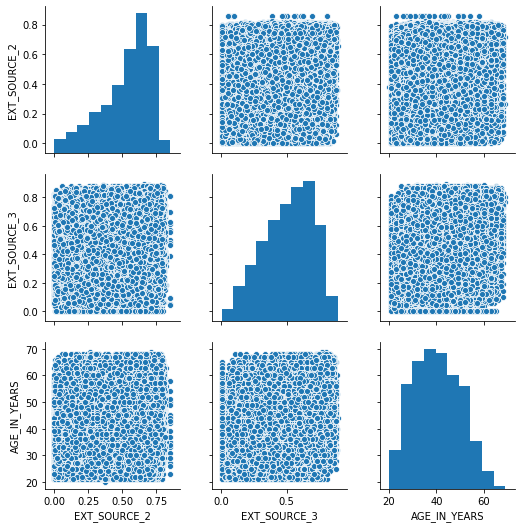

In [104]:
#plot the pair plot for numerical variables - EXT_SOURCE 2, EXT_SOURCE 3 and AGE_IN_YEARS in tar_0, for  dataframe.
sns.pairplot(data=tar_0,vars=["EXT_SOURCE_2","EXT_SOURCE_3",'AGE_IN_YEARS'])
plt.show()

### For tar_1

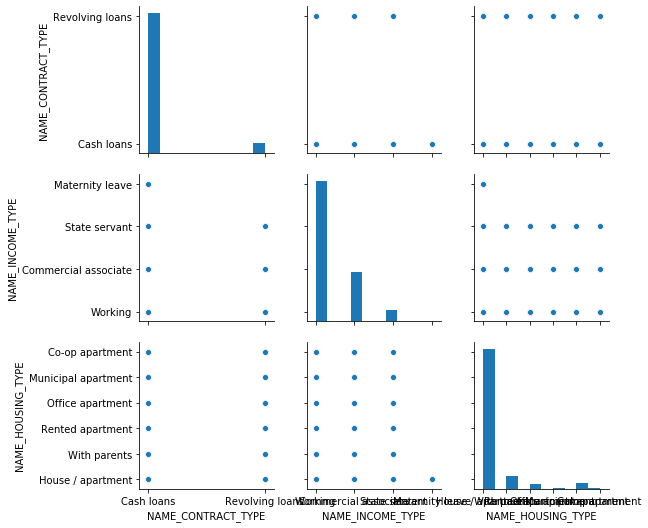

In [105]:
#plot the pair plot for categotical variables
sns.pairplot(data=tar_1,vars=['NAME_CONTRACT_TYPE','NAME_INCOME_TYPE','NAME_HOUSING_TYPE'])
plt.show()

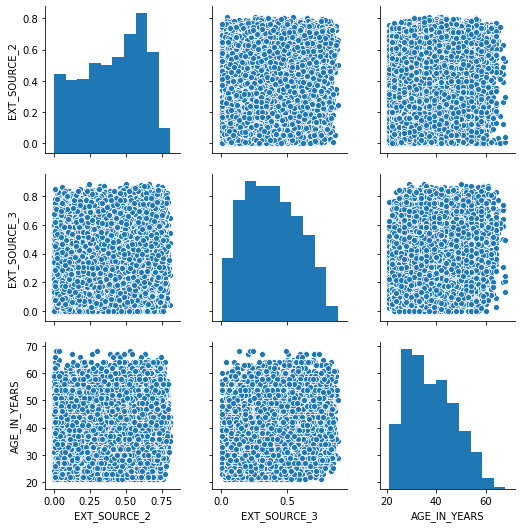

In [106]:
#plot the pair plot for numerical variables - EXT_SOURCE 2, EXT_SOURCE 3 and AGE_IN_YEARS in tar_0, for  dataframe.
sns.pairplot(data=tar_1,vars=["EXT_SOURCE_2","EXT_SOURCE_3",'AGE_IN_YEARS'])
plt.show()

# Import Previous Applications Data

In [107]:
prev_data = pd.read_csv('previous_application.csv')
prev_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [108]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

## Dropping the unnecessary columns using null percentage
We will be checking for null values and drop the columns having null values higher than 45%, as using such columns might give false outliers and mislead our analysis.

In [109]:
# Checking for null value percentages
nullper = round(100*(prev_data.isnull().sum()/len(prev_data.index)), 2)
print(nullper)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [110]:
#Dropping the columns having more than 45% of null-values.
ncols = np.where(nullper > 45)
previous_data = prev_data.drop(prev_data.columns[ncols], axis =1)

#Checking for the number of remaining columns and the percentage of null values in them.
print(previous_data.shape)
null_cols = round(100*(previous_data.isnull().sum()/len(previous_data.index)), 2) 
print(null_cols)

(1670214, 32)
SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
DAYS_FIRST_DRAWING      

In [111]:
#Checking if there are any duplicate rows.
previous_data['is_dup'] = previous_data.duplicated()

#Finding the rows with value 'is_dup' = True
indexNames = previous_data[ previous_data['is_dup'] == True ].index 
print(indexNames)

Int64Index([], dtype='int64')


In [112]:
# Since there no duplicate values, we can drop the is_dup column which was used to check for the duplicated rows. 
previous_data = previous_data.drop(['is_dup'], axis = 1)

### Checking for outliers in previous_data

In [113]:
#AMT_ANNUITY AMT_APPLICATION AMT_CREDIT AMT_GOODS_PRICE FLAG_LAST_APPL_PER_CONTRACT DAYS_DECISION 

#features = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','FLAG_LAST_APPL_PER_CONTRACT','DAYS_DECISION']
#plt.figure(figsize = (15,15))
#for i in enumerate(features):
#    plt.subplot(3,2,i[0]+1)
#    sns.boxplot(previous_data[i[1]])


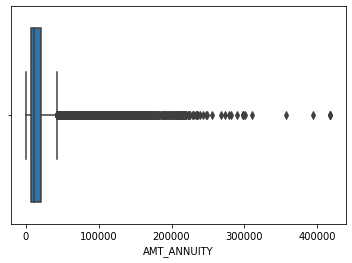

In [114]:
sns.boxplot(previous_data['AMT_ANNUITY'])

In [115]:
pd.set_option('float_format','{:f}'.format)
previous_data['AMT_ANNUITY'].describe()

count   1297979.000000
mean      15955.120659
std       14782.137335
min           0.000000
25%        6321.780000
50%       11250.000000
75%       20658.420000
max      418058.145000
Name: AMT_ANNUITY, dtype: float64

In [116]:

previous_data.AMT_ANNUITY.quantile([0.99,1])

0.990000    69685.788600
1.000000   418058.145000
Name: AMT_ANNUITY, dtype: float64

In [117]:
## Treating outliers for AMT_ANNUITY
previous_data.loc[previous_data.AMT_ANNUITY > previous_data.AMT_ANNUITY.quantile(0.99), 
                   'AMT_ANNUITY'] = previous_data.AMT_ANNUITY.quantile(0.99)


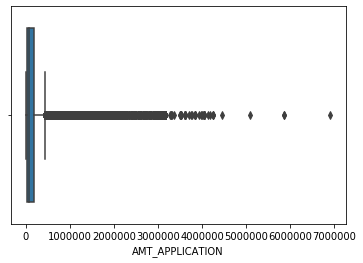

In [118]:
sns.boxplot(previous_data['AMT_APPLICATION'])

In [119]:
previous_data['AMT_APPLICATION'].describe()

count   1670214.000000
mean     175233.860360
std      292779.762387
min           0.000000
25%       18720.000000
50%       71046.000000
75%      180360.000000
max     6905160.000000
Name: AMT_APPLICATION, dtype: float64

In [120]:
## Treating outliers for AMT_APPLICATION
previous_data.loc[previous_data.AMT_APPLICATION > previous_data.AMT_APPLICATION.quantile(0.99), 
                   'AMT_APPLICATION'] = previous_data.AMT_APPLICATION.quantile(0.99)

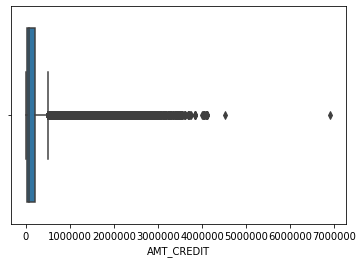

In [121]:
sns.boxplot(previous_data['AMT_CREDIT'])

In [122]:
## Treating outliers for AMT_CREDIT
previous_data.loc[previous_data.AMT_CREDIT > 4000000, 'AMT_CREDIT'] = 4000000

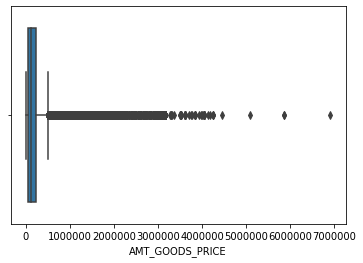

In [123]:
sns.boxplot(previous_data['AMT_GOODS_PRICE'])

In [124]:
## Treating outliers for AMT_GOODS_PRICE
previous_data.loc[previous_data.AMT_GOODS_PRICE > 3000000, 'AMT_GOODS_PRICE'] = 3000000

In [125]:
previous_data['FLAG_LAST_APPL_PER_CONTRACT'].value_counts()

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

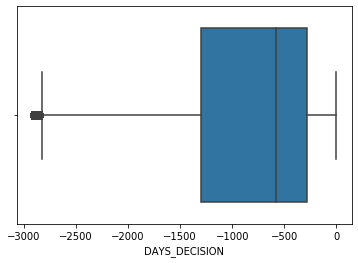

In [126]:
sns.boxplot(previous_data['DAYS_DECISION'])

In [127]:
previous_data['DAYS_DECISION'].describe()
previous_data['DAYS_DECISION'].quantile([0,0.01])

0.000000   -2922.000000
0.010000   -2835.000000
Name: DAYS_DECISION, dtype: float64

In [128]:
## Treating outliers for DAYS_DECISION
previous_data.loc[previous_data.DAYS_DECISION < -2835, 'DAYS_DECISION'] = previous_data.DAYS_DECISION.quantile(0.01)

# Merging Previous and Current Data

In [129]:
merged_data = pd.merge(analyze_subset, previous_data, how = 'inner', on = 'SK_ID_CURR', suffixes = ('_current','_previous') )
merged_data.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_current FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002       1                 Cash loans            N               Y   
1      100003       0                 Cash loans            N               N   
2      100003       0                 Cash loans            N               N   
3      100003       0                 Cash loans            N               N   
4      100004       0            Revolving loans            Y               Y   

   AMT_INCOME_TOTAL INCOME_BINNED  AMT_CREDIT_current CREDIT_BINNED  \
0     202500.000000          High       406597.500000        Medium   
1     270000.000000     Very High      1293502.500000     Very High   
2     270000.000000     Very High      1293502.500000     Very High   
3     270000.000000     Very High      1293502.500000     Very High   
4      67500.000000           Low       135000.000000           Low   

   AMT_ANNUITY_current ANNUITY_BINNED NAME_INCOME_TYPE  \
0         24700.500000         Medium          Working   
1         35698.500000      Very High    State servant   
2         35698.500000      Very High    State servant   
3         35698.500000      Very High    State servant   
4          6750.000000            Low          Working   

             NAME_EDUCATION_TYPE  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  House / apartment   
1               Higher education  House / apartment   
2               Higher education  House / apartment   
3               Higher education  House / apartment   
4  Secondary / secondary special  House / apartment   

   REGION_POPULATION_RELATIVE  AGE_IN_YEARS  DAYS_EMPLOYED FLAG_MOBIL  \
0                    0.018801            25            637          1   
1                    0.003541            45           1188          1   
2                    0.003541            45           1188          1   
3                    0.003541            45           1188          1   
4                    0.010032            52            225          1   

  FLAG_PHONE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REG_REGION_NOT_LIVE_REGION  \
0          1        Laborers         1.000000                           0   
1          1      Core staff         2.000000                           0   
2          1      Core staff         2.000000                           0   
3          1      Core staff         2.000000                           0   
4          1        Laborers         1.000000                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  \
0  Business Entity Type 3      0.262949      0.139376             1134.000000   
1                  School      0.622246           nan              828.000000   
2                  School      0.622246           nan              828.000000   
3                  School      0.622246           nan              828.000000   
4              Government      0.555912      0.729567              815.000000   

  DAYS_LAST_PHONE_CHANGE_BINNED FLAG_DOCUMENT_3  SK_ID_PREV  \
0                          High               1     1038818   
1                          High               1     1810518   
2                          High               1     2636178   
3                          High               1     2396755   
4                          High               0     1564014   

  NAME_CONTRACT_TYPE_previous  AMT_ANNUITY_previous  AMT_APPLICATION  \
0              Consumer loans           9251.775000    179055.000000   
1                  Cash loans          69685.788600    900000.000000   
2              Consumer loans          64567.665000    337500.000000   
3              Consumer loans           6737.310000     68809.500000   
4              Consumer loans           5357.250000     24282.000000   

   AMT_CREDIT_previous  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0        179055.000000    179055.000000                   SATURDAY   
1       1035882.000000    900000.000000                     FRIDAY  

In [130]:
#Inspection
print(merged_data.shape)
merged_data.info()

(1140118, 59)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140118 entries, 0 to 1140117
Data columns (total 59 columns):
SK_ID_CURR                       1140118 non-null int64
TARGET                           1140118 non-null int64
NAME_CONTRACT_TYPE_current       1140118 non-null object
FLAG_OWN_CAR                     1140118 non-null object
FLAG_OWN_REALTY                  1140118 non-null object
AMT_INCOME_TOTAL                 1140118 non-null float64
INCOME_BINNED                    1140118 non-null category
AMT_CREDIT_current               1140118 non-null float64
CREDIT_BINNED                    1140118 non-null category
AMT_ANNUITY_current              1140025 non-null float64
ANNUITY_BINNED                   1140025 non-null category
NAME_INCOME_TYPE                 1140118 non-null object
NAME_EDUCATION_TYPE              1140118 non-null object
NAME_HOUSING_TYPE                1140118 non-null object
REGION_POPULATION_RELATIVE       1140118 non-null float64
AGE_IN_YEA

In [131]:
# Checking for null value percentage for each column
null_values = round(100*(merged_data.isnull().sum()/len(merged_data.index)), 2)
print(null_values)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE_current       0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
AMT_INCOME_TOTAL                 0.000000
INCOME_BINNED                    0.000000
AMT_CREDIT_current               0.000000
CREDIT_BINNED                    0.000000
AMT_ANNUITY_current              0.010000
ANNUITY_BINNED                   0.010000
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
AGE_IN_YEARS                     0.000000
DAYS_EMPLOYED                    0.000000
FLAG_MOBIL                       0.000000
FLAG_PHONE                       0.000000
OCCUPATION_TYPE                 16.140000
CNT_FAM_MEMBERS                  0.000000
REG_REGION_NOT_LIVE_REGION       0.000000
ORGANIZATION_TYPE                0.000000
EXT_SOURCE_2                     0

In [132]:
##Subset of defaulters in merged data

default = merged_data.loc[(merged_data['TARGET']==1)]
default.head(200)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_current FLAG_OWN_CAR  \
0         100002       1                 Cash loans            N   
148       100047       1                 Cash loans            N   
149       100047       1                 Cash loans            N   
150       100047       1                 Cash loans            N   
151       100047       1                 Cash loans            N   
152       100047       1                 Cash loans            N   
153       100047       1                 Cash loans            N   
158       100049       1                 Cash loans            N   
159       100049       1                 Cash loans            N   
160       100049       1                 Cash loans            N   
161       100049       1                 Cash loans            N   
162       100049       1                 Cash loans            N   
395       100112       1                 Cash loans            Y   
396       100112       1                 Cash loans            Y   
397       100112       1                 Cash loans            Y   
398       100112       1                 Cash loans            Y   
441       100130       1                 Cash loans            N   
442       100130       1                 Cash loans            N   
549       100160       1                 Cash loans            N   
550       100160       1                 Cash loans            N   
551       100160       1                 Cash loans            N   
603       100181       1                 Cash loans            N   
604       100181       1                 Cash loans            N   
605       100181       1                 Cash loans            N   
606       100181       1                 Cash loans            N   
607       100181       1                 Cash loans            N   
608       100181       1                 Cash loans            N   
609       100181       1                 Cash loans            N   
610       100181       1                 Cash loans            N   
611       100181       1                 Cash loans            N   
723       100209       1            Revolving loans            N   
724       100209       1            Revolving loans            N   
725       100209       1            Revolving loans            N   
733       100214       1                 Cash loans            N   
734       100214       1                 Cash loans            N   
735       100214       1                 Cash loans            N   
736       100214       1                 Cash loans            N   
876       100246       1                 Cash loans            N   
877       100246       1                 Cash loans            N   
878       100246       1                 Cash loans            N   
952       100273       1                 Cash loans            N   
953       100273       1                 Cash loans            N   
954       100273       1                 Cash loans            N   
955       100273       1                 Cash loans            N   
956       100273       1                 Cash loans            N   
957       100273       1                 Cash loans            N   
958       100273       1                 Cash loans            N   
959       100273       1                 Cash loans            N   
960       100273       1                 Cash loans            N   
961       100273       1                 Cash loans            N   
978       100286       1                 Cash loans            Y   
1047      100300       1                 Cash loans            N   
1048      100300       1                 Cash loans            N   
1049      100301       1                 Cash loans            N   
1050      100301       1                 Cash loans            N   
1051      100301       1                 Cash loans            N   
1052      100301       1                 Cash loans            N   
1053      100301       1                 Cash loans           

In [133]:
default.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_current', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'INCOME_BINNED',
       'AMT_CREDIT_current', 'CREDIT_BINNED', 'AMT_ANNUITY_current',
       'ANNUITY_BINNED', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_PHONE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REG_REGION_NOT_LIVE_REGION', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_LAST_PHONE_CHANGE_BINNED', 'FLAG_DOCUMENT_3', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_previous', 'AMT_ANNUITY_previous',
       'AMT_APPLICATION', 'AMT_CREDIT_previous', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CO

In [134]:
default = default[['SK_ID_CURR', 'TARGET','NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE_current', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'INCOME_BINNED',
       'AMT_CREDIT_current', 'AMT_CREDIT_previous', 'AMT_ANNUITY_current', 'ANNUITY_BINNED','AMT_ANNUITY_previous',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REG_REGION_NOT_LIVE_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE_previous',
       'AMT_APPLICATION', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE',  'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']]
default.head(200)

SK_ID_CURR  TARGET NAME_CONTRACT_STATUS NAME_CONTRACT_TYPE_current  \
0         100002       1             Approved                 Cash loans   
148       100047       1             Approved                 Cash loans   
149       100047       1             Approved                 Cash loans   
150       100047       1              Refused                 Cash loans   
151       100047       1             Approved                 Cash loans   
152       100047       1             Approved                 Cash loans   
153       100047       1              Refused                 Cash loans   
158       100049       1             Approved                 Cash loans   
159       100049       1             Approved                 Cash loans   
160       100049       1             Approved                 Cash loans   
161       100049       1             Approved                 Cash loans   
162       100049       1             Approved                 Cash loans   
395       100112       1             Approved                 Cash loans   
396       100112       1             Approved                 Cash loans   
397       100112       1             Approved                 Cash loans   
398       100112       1             Approved                 Cash loans   
441       100130       1             Approved                 Cash loans   
442       100130       1             Approved                 Cash loans   
549       100160       1         Unused offer                 Cash loans   
550       100160       1             Approved                 Cash loans   
551       100160       1             Approved                 Cash loans   
603       100181       1             Canceled                 Cash loans   
604       100181       1             Approved                 Cash loans   
605       100181       1             Canceled                 Cash loans   
606       100181       1             Canceled                 Cash loans   
607       100181       1             Approved                 Cash loans   
608       100181       1              Refused                 Cash loans   
609       100181       1             Approved                 Cash loans   
610       100181       1             Canceled                 Cash loans   
611       100181       1             Approved                 Cash loans   
723       100209       1             Approved            Revolving loans   
724       100209       1             Canceled            Revolving loans   
725       100209       1             Approved            Revolving loans   
733       100214       1             Approved                 Cash loans   
734       100214       1             Approved                 Cash loans   
735       100214       1              Refused                 Cash loans   
736       100214       1             Approved                 Cash loans   
876       100246       1             Canceled                 Cash loans   
877       100246       1              Refused                 Cash loans   
878       100246       1             Approved                 Cash loans   
952       100273       1             Canceled                 Cash loans   
953       100273       1             Approved                 Cash loans   
954       100273       1             Approved                 Cash loans   
955       100273       1              Refused                 Cash loans   
956       100273       1             Approved                 Cash loans   
957       100273       1              Refused                 Cash loans   
958       100273       1             Approved                 Cash loans   
959       100273       1              Refused                 Cash loans   
960       100273       1              Refused                 Cash loans   
961       100273       1             Approved                 Cash loans   
978       100286       1             Approved                 Cash loans   
1047      100300       1             Approved         

In [135]:
default.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_STATUS',
       'NAME_CONTRACT_TYPE_current', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'INCOME_BINNED', 'AMT_CREDIT_current',
       'AMT_CREDIT_previous', 'AMT_ANNUITY_current', 'ANNUITY_BINNED',
       'AMT_ANNUITY_previous', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_PHONE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REG_REGION_NOT_LIVE_REGION', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE',
       'FLAG_DOCUMENT_3', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_previous',
       'AMT_APPLICATION', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS

# BIVARIATE ANALYSIS of merged dataframe

## Continuous - Categorical bivariate analysis

In [136]:
default['DAYS_DECISION'] = default['DAYS_DECISION'] * (-1)

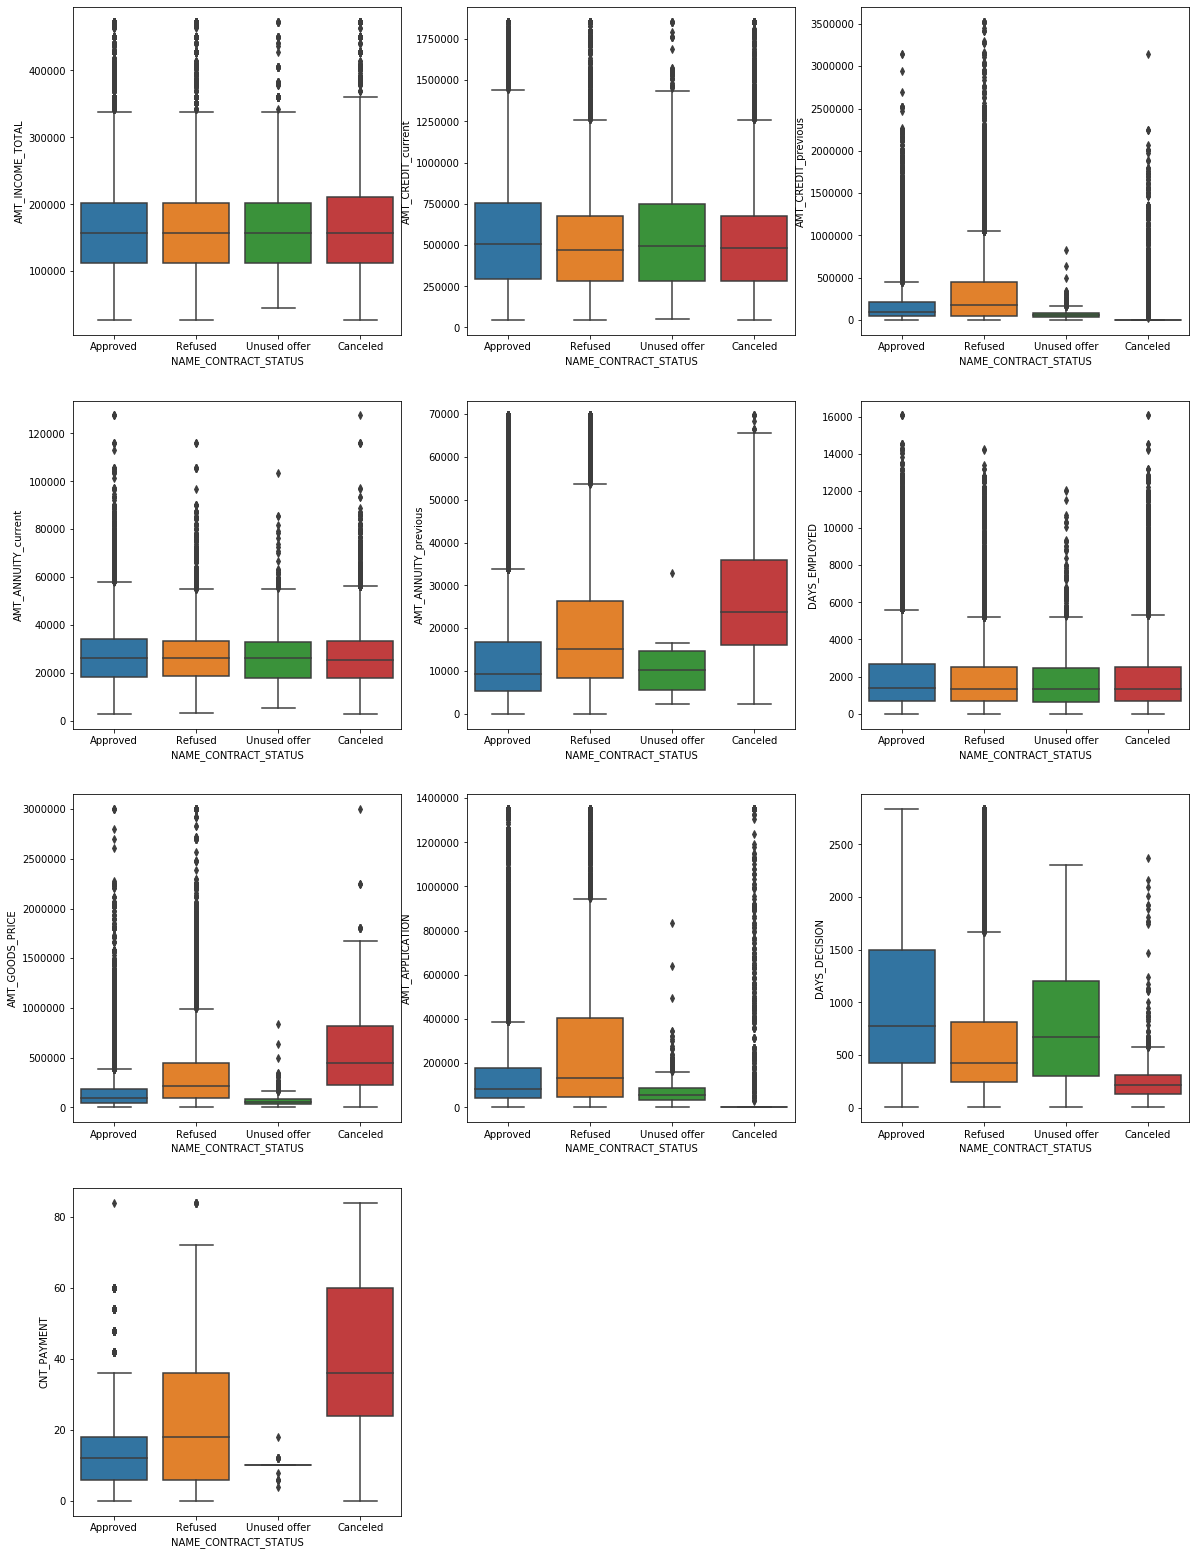

In [137]:
## Analysis of income, credit, annuity, family members, last phone change with contract_status (cont-cat)

plt.figure(figsize = (20,35))
check = ['AMT_INCOME_TOTAL','AMT_CREDIT_current','AMT_CREDIT_previous', 'AMT_ANNUITY_current',
         'AMT_ANNUITY_previous','DAYS_EMPLOYED','AMT_GOODS_PRICE','AMT_APPLICATION','DAYS_DECISION',
        'CNT_PAYMENT']


for i in enumerate(check):
    plt.subplot(5 ,3 ,i[0]+1)
    sns.boxplot(x='NAME_CONTRACT_STATUS',y=i[1], data = default )

## Inferences from the above graphs

#### 1. AMT_INCOME_TOTAL : We observed that the income of the applicant in all the categories of contract status are almost the same, which means that the income of the applicant has no effect on the status of the loan.
#### 2. AMT_CREDIT_current : We observed that the credit amount in all the categories of contract status are more or less the same, which means that no concrete inferences can be derived from this graph.
#### 3. AMT_CREDIT_previous : We observed that the credit amount in 'refused' category of contract status are more or less the same, which means that the higher the credit amount, the higher is the probability of the loan to be refused.
#### 4. AMT_ANNUITY_current : We observed that the current annuity of the applicant in all the categories of contract status are almost the same, which means that the current annuity of the applicant has no effect on the status of the loan.
#### 5. AMT_ANNUITY_current : We observed that the previous annuity of the applicant being higher has more chances of making the loan 'refused' or 'cancelled'.
#### 6. DAYS_EMPLOYED :  We observed that the days employed of the applicant in all the categories of contract status are almost the same, which means that the days employed of the applicant has no effect on the status of the loan.
#### 7. AMT_GOODS_PRICE: We observed that the goods price being higher has more chances of making the loan 'refused' or 'cancelled'.
#### 8. AMT_APPLICATION: We observed that the application amount for the loan being higher has more chances of making the loan 'refused' but very little chances of being 'cancelled'.
#### 9. DAYS_DECISION : When the bank takes higher number of days to make a decision, there is a higher probability for the loan to be 'approved'.
#### 10. CNT_PAYMENT : We observed that the higher the term of credit of previous application, the higher are the chances of the loan being 'cancelled or 'refused'.

## Categorical - Categorical Bivariate analysis

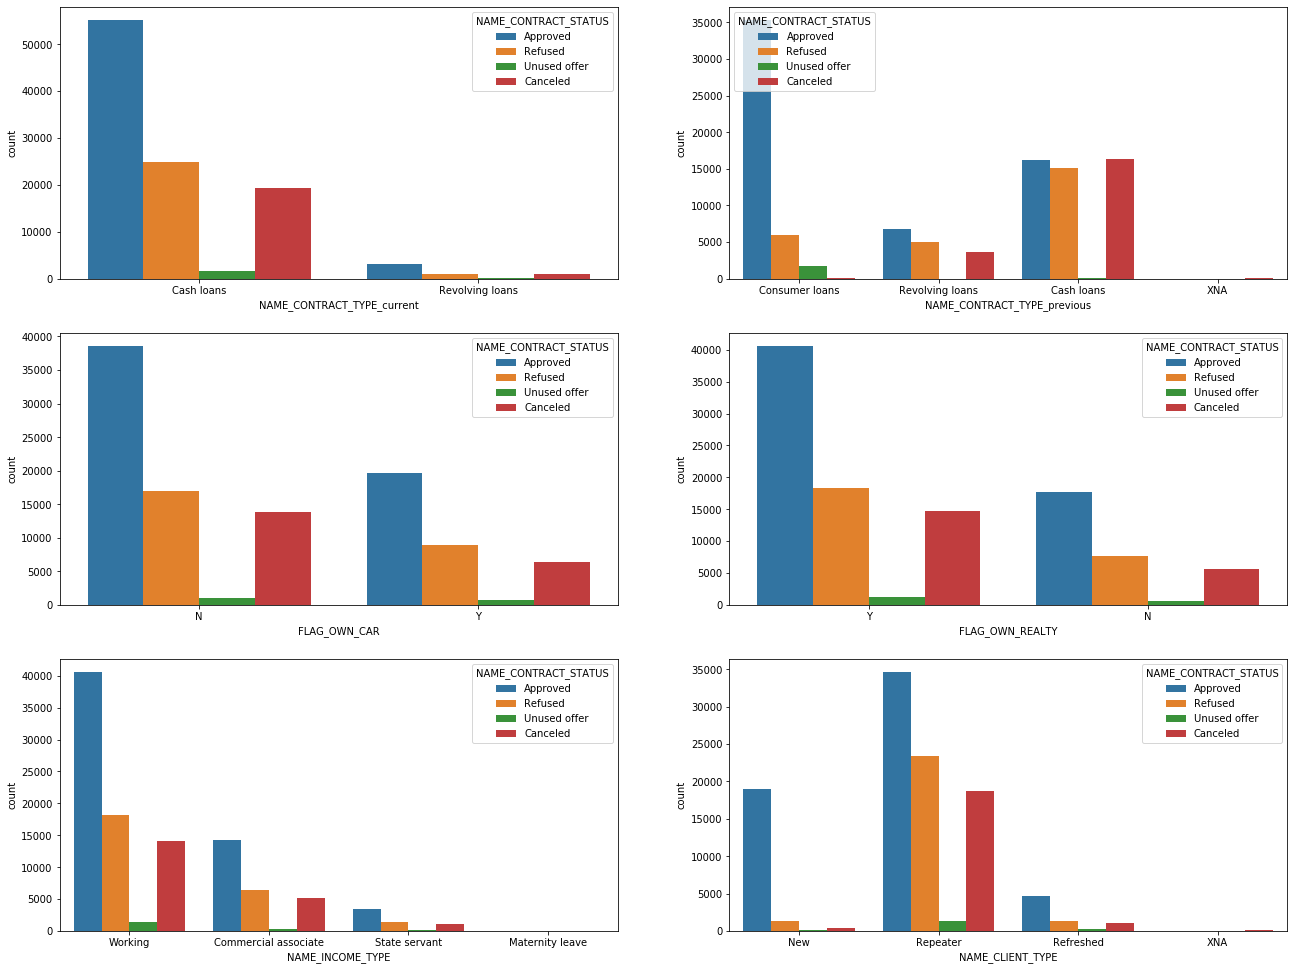

In [138]:
#Analysis of NAME_CONTRACT_TYPE_current,NAME_CONTRACT_TYPE_previous	'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
#'NAME_INCOME_TYPE', NAME_CLIENT_TYPE


features = ['NAME_CONTRACT_TYPE_current','NAME_CONTRACT_TYPE_previous','FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
            'NAME_INCOME_TYPE','NAME_CLIENT_TYPE']

plt.figure(figsize=(22,35))

for i in enumerate(features):
    plt.subplot(6,2,i[0]+1)
    sns.countplot(x=i[1], hue = 'NAME_CONTRACT_STATUS', data = default)

## Inferences from the above categorical-categorical analysis

#### 1. NAME_CONTRACT_TYPE_current : We observed that the cash loans applied by the defaulters was significantly higher and under 'cash loans' the probability of previous applications being approved was the highest.
#### 2. NAME_CONTRACT_TYPE_current : We observed that the 'consumer loans' had the highest probability of being approved, while the 'cash loans' had the almost equal probability of being cancelled or approved.
#### 3. FLAG_OWN_CAR: We observed that the applicant who did not own a car had higher probability of getting the loan 'approved' than the applicant who owed a car.
#### 4. FLAG_OWN_REALTY: We observed that the applicant who owned a realty had more probability of getting the loan 'approved' than  the applicant who did not. 
#### 5. NAME_INCOME_TYPE : We observed from the current defaulters that there was a higher probability of their loan being approved in the past if their 'income type' was of a 'working' class. 
#### 6. NAME_CLIENT_TYPE: We observed that if the client was a repeater in the bank then the applicant had a higher probability of the loan being 'approved'. A similar trend can be seen for a 'new' applicant but the total number of loans 'approved' for new applicant is almost the half of the 'repeated' clients.


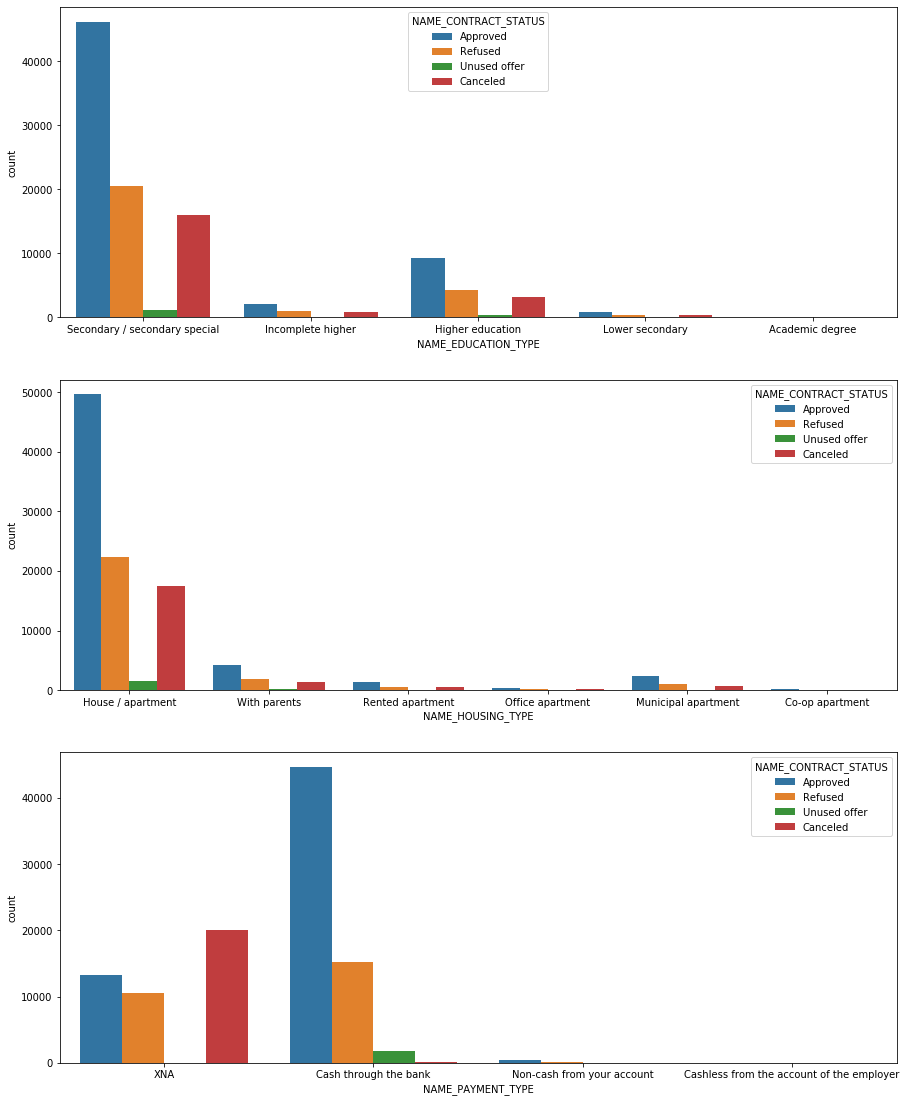

In [139]:
## CHEKING FOR 'NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE',NAME_PAYMENT_TYPE,
features = ['NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','NAME_PAYMENT_TYPE']

plt.figure(figsize=(15,40))

for i in enumerate(features):
    plt.subplot(6,1,i[0]+1)
    sns.countplot(x=i[1], hue = 'NAME_CONTRACT_STATUS', data = default)

## Inferences from the remaining categorical-categorical graphs
#### 1. NAME_EDUCATION_TYPE : We can observe from the graph that there were higher chances of the loan being 'approved' if the education of the applicant was 'secondary/secondary special'.
#### 2. NAME_HOUSING_TYPE : We observed from the graph that the loan had higher probability of being 'approved' if the type of residence of the applicant was 'house/apartment' .
#### 3. NAME_PAYMENT_TYPE: We observed from the graph that the loan had higher probability of being 'approved' if the payment type was 'cash through the bank'.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

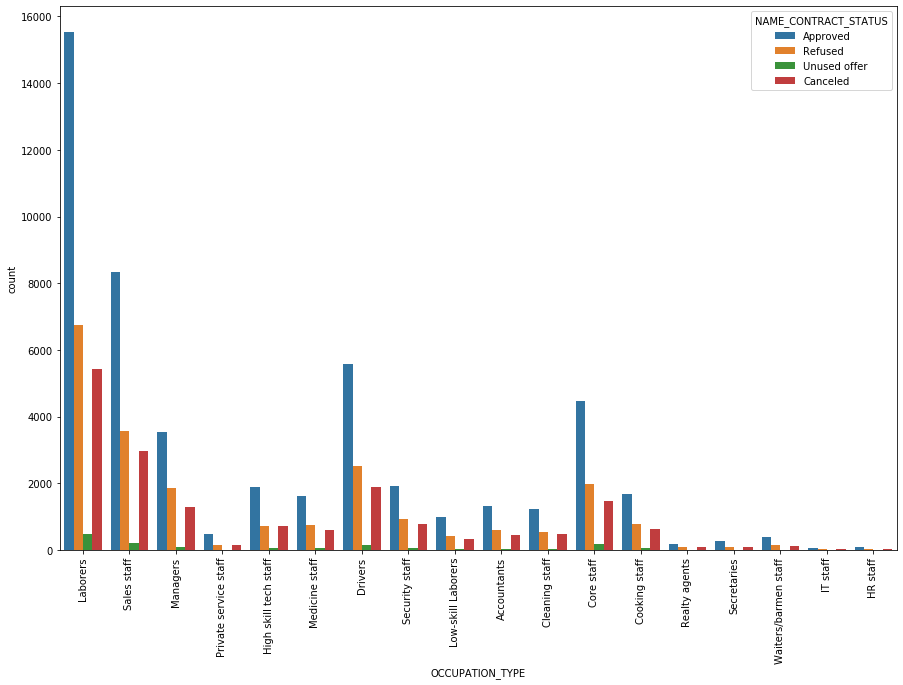

In [140]:
##CHECKING FOR OCCUPATION_TYPE
plt.figure(figsize = (15,10))
sns.countplot(x = 'OCCUPATION_TYPE',hue='NAME_CONTRACT_STATUS',data = default)
plt.xticks(rotation = 90)

## Inferences from above graph
#### We can clearly observe from the above graph that the majority of applicants in the previous data had their loan application 'approved' in the following decreasing order respectively: Labourers, Sales Staff, Drivers, Core staff, and managers.

In [141]:
default.loc[default.NAME_GOODS_CATEGORY == 'XNA','NAME_GOODS_CATEGORY'] =np.NaN

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

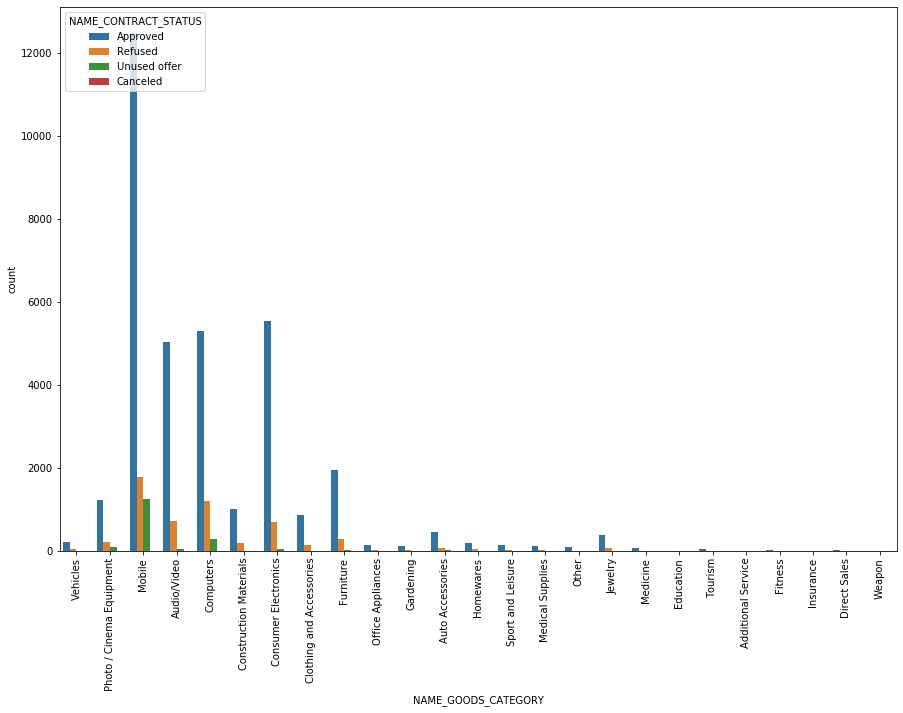

In [142]:
##CHECKING FOR #NAME_GOODS_CATEGORY
plt.figure(figsize = (15,10))
sns.countplot(x = 'NAME_GOODS_CATEGORY',hue='NAME_CONTRACT_STATUS',data = default)
plt.xticks(rotation = 90)

## Inferences from the above graph
#### NAME_GOOD_CATEGORY : We can clearly infer from the above graph that the loan was highly likely to be approved if the goods for which the loan was applied previously was respectively, 'mobile','audio/video','Consumer Electronics' and 'Computers'.

# Previous status of person who is currently a defaulter 
## 1. AMT_CREDIT_previous : A current defaulter was previously refused the loan if his/her credit was below 500000. 
## 2. AMT_ANNUITY_previous : A current defaulter previously cancelled the loan if annuity was roughly between 15000 and 40000, and was currently refused the loan if the annuity was roughly in the range of 10000 and 30000.
## 3. AMT_APPLICATION:  A current defaulter was previously refused the loan if the amount applied was roughly between 200000 to 400000.
## 4.CNT_PAYMENT:  A current defaulter previously cancelled the loan if the term of previous credit was roughly between 20 and 60 and was refused if the term of credit in previous application was roughly between 20 and 40.
## 5. NAME_CONTRACT_TYPE:  A current defaulter was previously approved in around 30 percent of the cases (roughly 15000 cases), but also refused or cacelled in around 30 percent cases respectively in cash loans category. 
## 6. NAME_INCOME_TYPE :  A current defaulter was previously approved for loan in around 40000 cases whereas was refused in around 18000 and cancelled for loan in around 14000 cases.
## 7. NAME_CLIENT_TYPE:  A current defaulter was previously majorly approved if the client was a repeater.


In [143]:
##Checking for datatypes of the 'default' dataframe

default.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_STATUS             object
NAME_CONTRACT_TYPE_current       object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
AMT_INCOME_TOTAL                float64
INCOME_BINNED                  category
AMT_CREDIT_current              float64
AMT_CREDIT_previous             float64
AMT_ANNUITY_current             float64
ANNUITY_BINNED                 category
AMT_ANNUITY_previous            float64
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
AGE_IN_YEARS                      int64
DAYS_EMPLOYED                     int64
FLAG_MOBIL                       object
FLAG_PHONE                       object
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REG_REGION_NOT_LIVE_REGION        int64
ORGANIZATION_TYPE                object


## Analysis of defaulters who were previously REJECTED

In [144]:
## cHECKING IF A DEFAULTER WAS REJECTED EARLIER AND WHAT CONDITON HAS CHANGED 

rejected = default.loc[(default['NAME_CONTRACT_STATUS']=='Refused')]
rejected.head(50)


SK_ID_CURR  TARGET NAME_CONTRACT_STATUS NAME_CONTRACT_TYPE_current  \
150       100047       1              Refused                 Cash loans   
153       100047       1              Refused                 Cash loans   
608       100181       1              Refused                 Cash loans   
735       100214       1              Refused                 Cash loans   
877       100246       1              Refused                 Cash loans   
955       100273       1              Refused                 Cash loans   
957       100273       1              Refused                 Cash loans   
959       100273       1              Refused                 Cash loans   
960       100273       1              Refused                 Cash loans   
1049      100301       1              Refused                 Cash loans   
1050      100301       1              Refused                 Cash loans   
1051      100301       1              Refused                 Cash loans   
1052      100301       1              Refused                 Cash loans   
1053      100301       1              Refused                 Cash loans   
1523      100452       1              Refused                 Cash loans   
1573      100472       1              Refused                 Cash loans   
1586      100477       1              Refused                 Cash loans   
1629      100485       1              Refused            Revolving loans   
1631      100485       1              Refused            Revolving loans   
1633      100485       1              Refused            Revolving loans   
1869      100540       1              Refused                 Cash loans   
1889      100547       1              Refused                 Cash loans   
1890      100547       1              Refused                 Cash loans   
1891      100547       1              Refused                 Cash loans   
1894      100547       1              Refused                 Cash loans   
1895      100547       1              Refused                 Cash loans   
1897      100547       1              Refused                 Cash loans   
1900      100547       1              Refused                 Cash loans   
1901      100547       1              Refused                 Cash loans   
2106      100616       1              Refused                 Cash loans   
2168      100636       1              Refused                 Cash loans   
2214      100649       1              Refused                 Cash loans   
2439      100717       1              Refused                 Cash loans   
2441      100717       1              Refused                 Cash loans   
2442      100717       1              Refused                 Cash loans   
2443      100717       1              Refused                 Cash loans   
2653      100796       1              Refused                 Cash loans   
2655      100796       1              Refused                 Cash loans   
2660      100796       1              Refused                 Cash loans   
2663      100796       1              Refused                 Cash loans   
2698      100808       1              Refused                 Cash loans   
2909      100879       1              Refused                 Cash loans   
2911      100879       1              Refused                 Cash loans   
2913      100879       1              Refused                 Cash loans   
2954      100896       1              Refused                 Cash loans   
3121      100945       1              Refused                 Cash loans   
3122      100945       1              Refused                 Cash loans   
3211      100971       1              Refused                 Cash loans   
3215      100971       1              Refused                 Cash loans   
3216      100971       1              Refused                 Cash loans   

     FLAG_OWN_CAR FLAG_OWN_REALTY  AMT_INCOME_TOTAL INCOME_BINNED  \
150             N               Y     202500.000000         

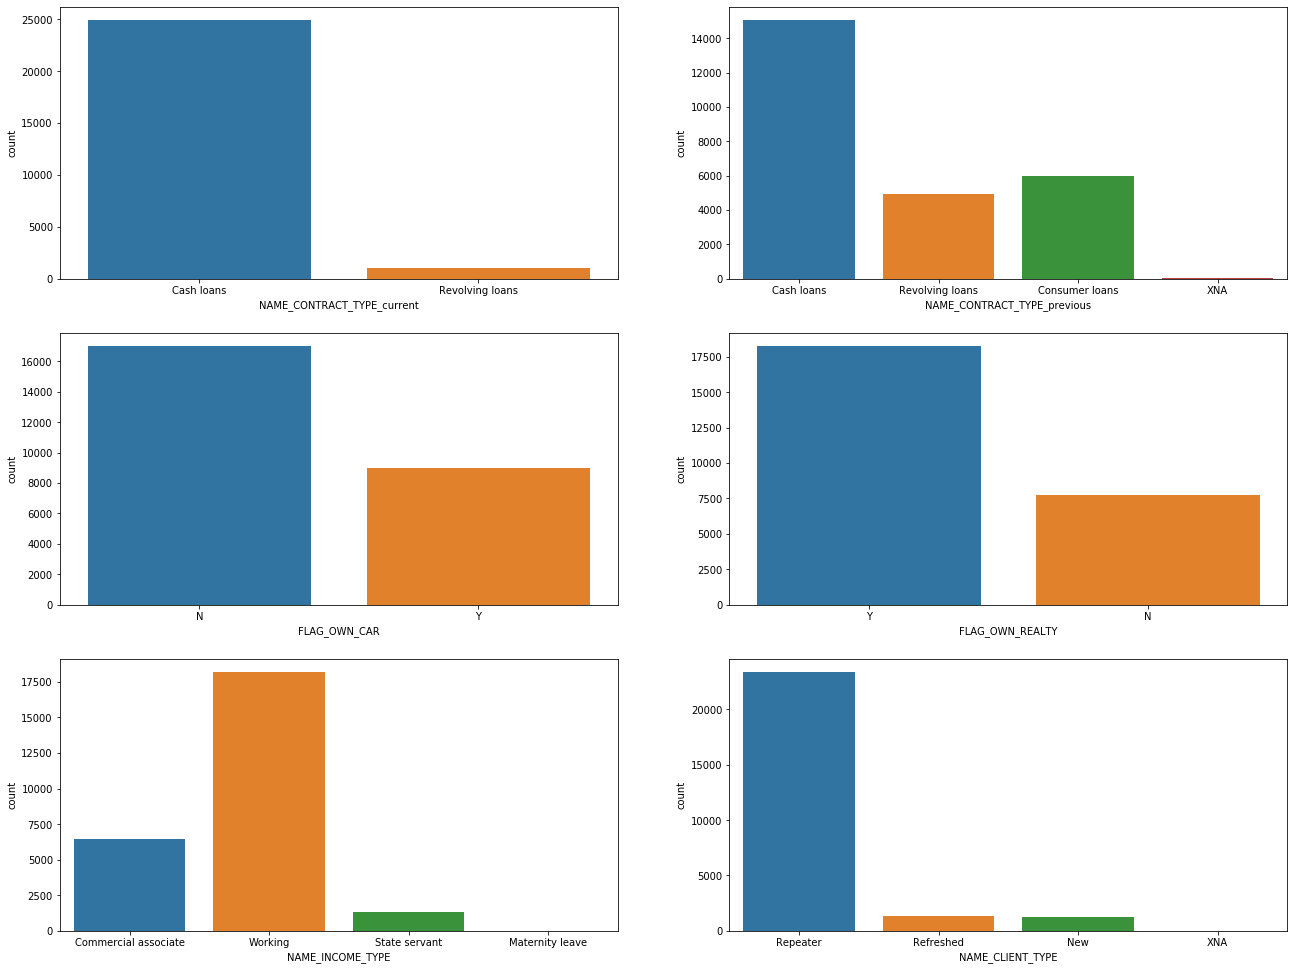

In [145]:
#Analysis of NAME_CONTRACT_TYPE_current,NAME_CONTRACT_TYPE_previous	'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
#'NAME_INCOME_TYPE', NAME_CLIENT_TYPE

features = ['NAME_CONTRACT_TYPE_current','NAME_CONTRACT_TYPE_previous','FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
            'NAME_INCOME_TYPE','NAME_CLIENT_TYPE']

plt.figure(figsize=(22,35))

for i in enumerate(features):
    plt.subplot(6,2,i[0]+1)
    sns.countplot(x=i[1], data = rejected)

### Inferences of previously rejected applicants

#### 1. NAME_CONTRACT_TYPE_current : We observed from the graph that high majority of defaulter applicants who were previously rejected applied for cash loans in the current data.
#### 2. NAME_CONTRACT_TYPE_previous :  We observed from the graph that high majority of defaulter applicants who were previously rejected applied for cash loans in the previous data. 
#### 3. FLAG_OWN_CAR: We observed from the graph that high majority of defaulter applicants who were previously rejected did not own a car.
#### 4. FLAG_OWN_REALTY: We observed from the graph that high majority of defaulter applicants who were previously rejected owned a realty.
#### 5. NAME_INCOME_TYPE :We observed from the graph that high majority of defaulter applicants who were previously rejected belonged to the working class in income type.
#### 6. NAME_CLIENT_TYPE: We observed from the graph that high majority of defaulter applicants who were previously rejected were repeated clients. 

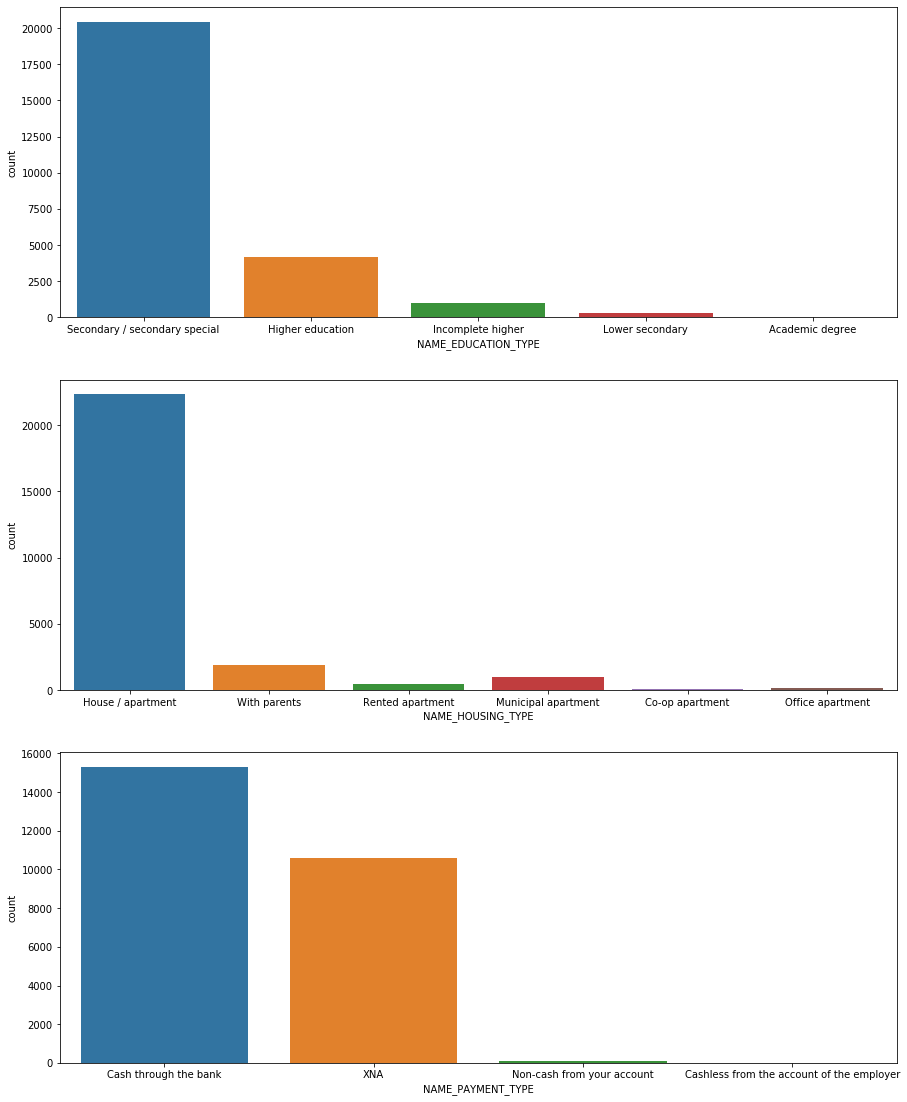

In [146]:
## CHEKING FOR 'NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE',NAME_PAYMENT_TYPE,
features = ['NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','NAME_PAYMENT_TYPE']

plt.figure(figsize=(15,40))

for i in enumerate(features):
    plt.subplot(6,1,i[0]+1)
    sns.countplot(x=i[1],data = rejected)

## Inferences from the remaining categorical-categorical graphs
#### 1. NAME_EDUCATION_TYPE :We observed from the graph that high majority of defaulter applicants who were previously rejected belonged to the 'secondary/secondary special' category.
#### 2. NAME_HOUSING_TYPE : We observed from the graph that high majority of defaulter applicants who were previously rejected resided in  'house/apartment' .
#### 3. NAME_PAYMENT_TYPE: We observed from the graph that high majority of defaulter applicants were previously rejected if the payment type was 'cash through the bank'.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

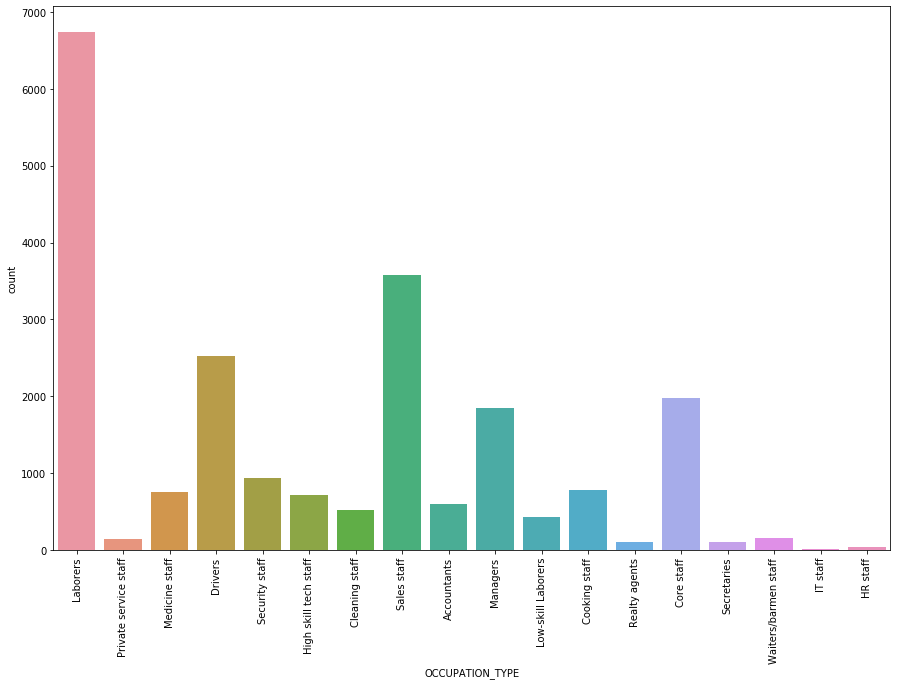

In [147]:
##CHECKING FOR OCCUPATION_TYPE
plt.figure(figsize = (15,10))
sns.countplot(x = 'OCCUPATION_TYPE',data = rejected)
plt.xticks(rotation = 90)

## Inferences from occupation type graph

#### We observed from the graph that high majority of defaulter applicants who were previously rejected belonged to the category of labourers, sales staff, drivers, core staff, and managers respectively in order of decreasing majority.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

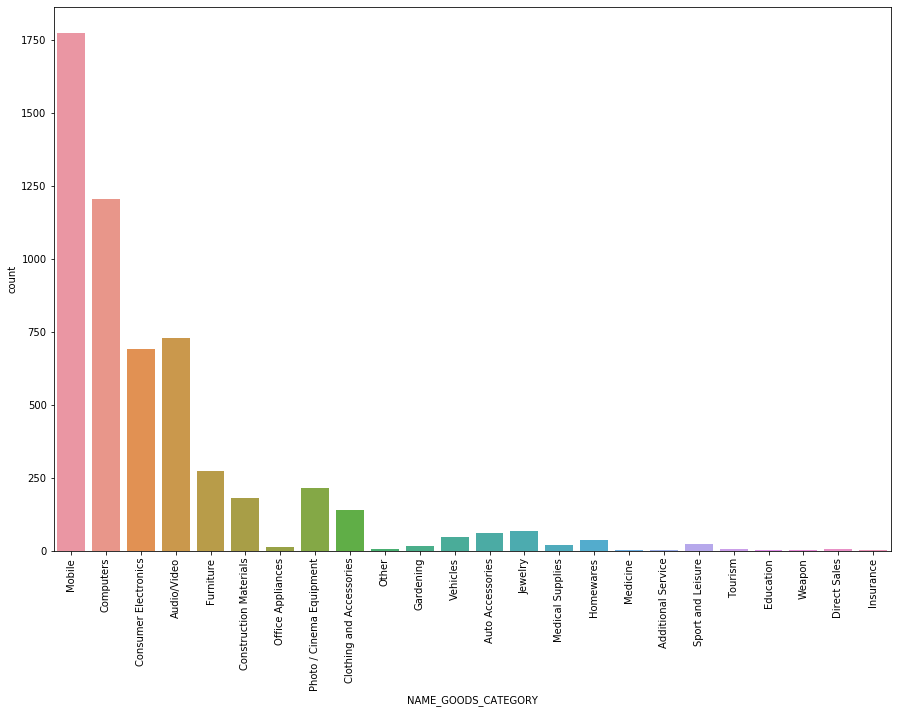

In [148]:
##CHECKING FOR #NAME_GOODS_CATEGORY
plt.figure(figsize = (15,10))
sns.countplot(x = 'NAME_GOODS_CATEGORY',data = rejected)
plt.xticks(rotation = 90)

# Inferences from the above graph
#### NAME_GOOD_CATEGORY : We can clearly infer from the above graph that the defaulter applicants who were rejected in the previous data applied previously respectively, 'mobile','audio/video','Consumer Electronics' and 'Computers', in decreasing order of majority.

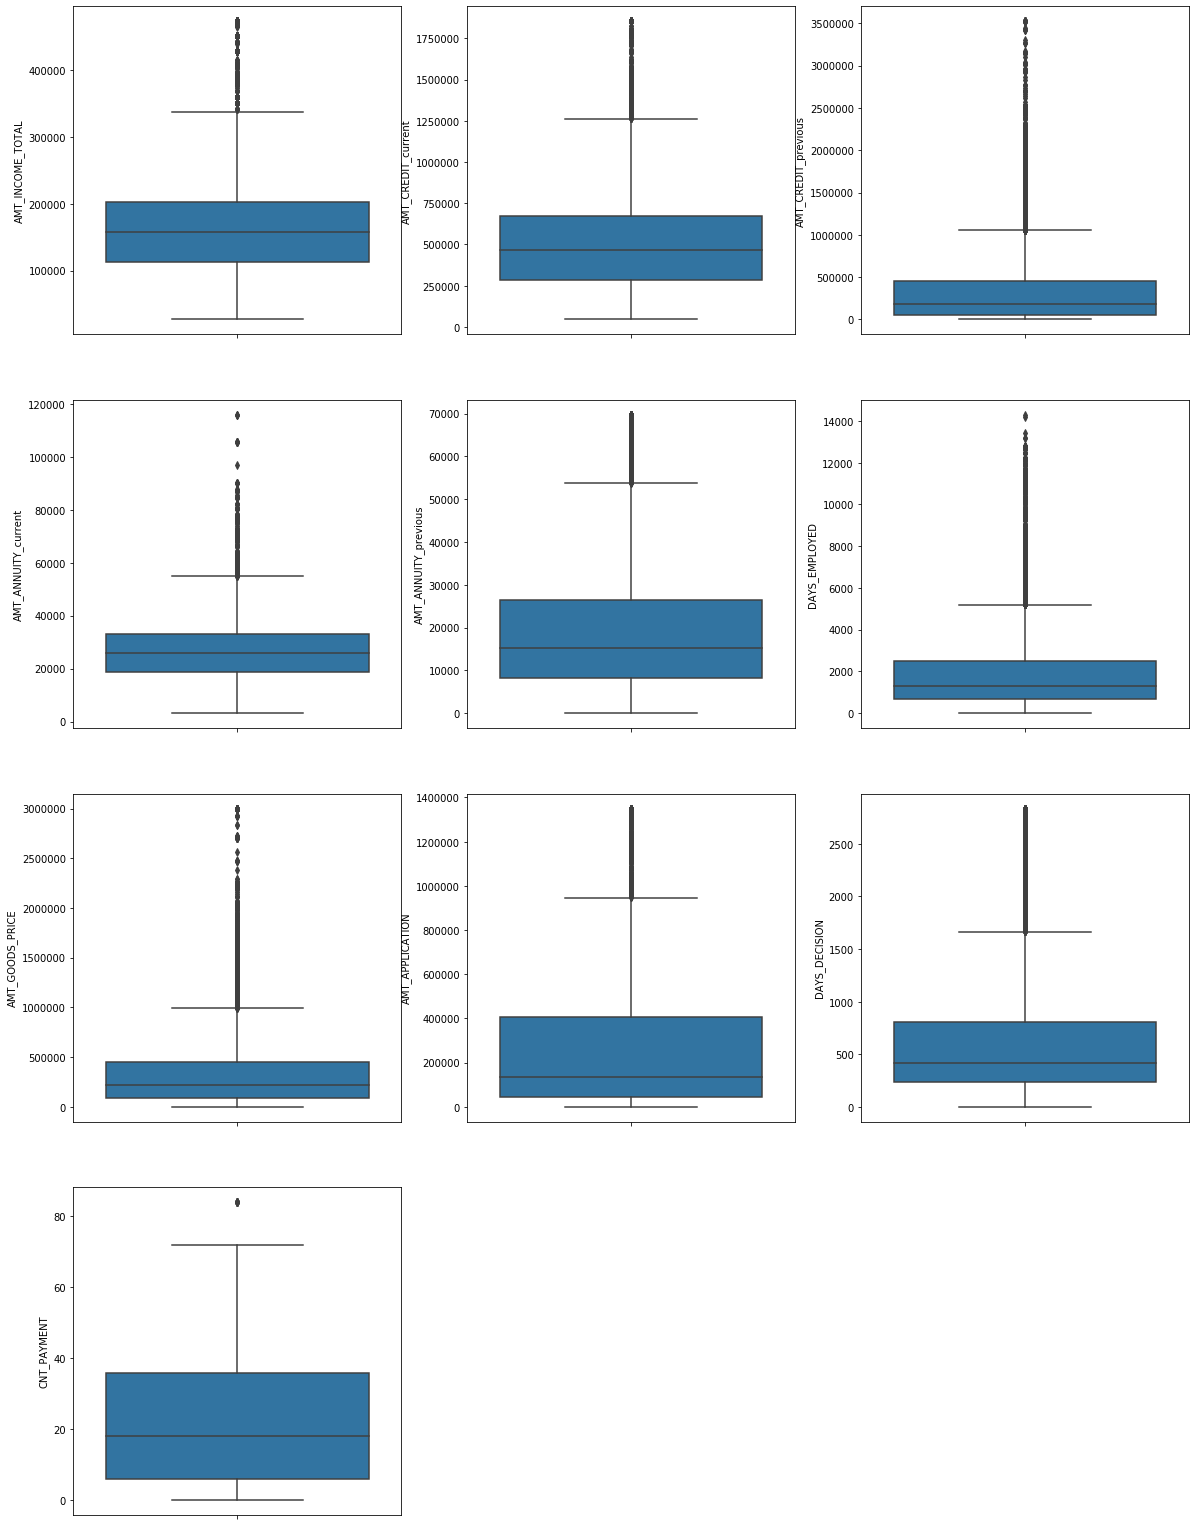

In [149]:
## Analysis of income, credit, annuity, family members, last phone change with contract_status (cont-cat)

plt.figure(figsize = (20,35))
check = ['AMT_INCOME_TOTAL','AMT_CREDIT_current','AMT_CREDIT_previous', 'AMT_ANNUITY_current',
         'AMT_ANNUITY_previous','DAYS_EMPLOYED','AMT_GOODS_PRICE','AMT_APPLICATION','DAYS_DECISION',
        'CNT_PAYMENT']

for i in enumerate(check):
    plt.subplot(5 ,3 ,i[0]+1)
    sns.boxplot(y=i[1], data = rejected )

## Inferences about numerical variables from defaulters who were previously rejected

#### 1. AMT_INCOME_TOTAL : The defaulters who were previously rejected had their income majorly between 100000 and 200000.
#### 2. AMT_CREDIT_current : The defaulters who were previously rejected had credit majorly between 250000 and 750000 in the current data.
#### 3. AMT_CREDIT_previous :The defaulters who were previously rejected majorly had credit less than 500000 in the previous data.
#### 4. AMT_ANNUITY_current :The defaulters who were previously rejected majorly had annuity from around 20000 to less than 40000 in the current data.
#### 5. AMT_ANNUITY_previous : The defaulters who were previously rejected majorly had annuity from around 10000 to less than 30000 in the previous data.
#### 6. DAYA_EMPLOYED: The defaulters who were previously rejected had majority of days of employment less than 3000.
#### 7. AMT_GOODS_PRICE: The defaulters who were previously rejected majorly had goods price below 500000.
#### 8. AMT_APPLICATION: The defaulters who were previously rejected majorly had the application amount ranging till around 400000.
#### 9. DAYS_DECISION: The number of processing days taken by the bank for the defaulters who were previously rejected was around 250 to 800.
#### 10. CNT_PAYMENT :The defaulters who were previously rejected had their term of previous credit in the range of roughly 5 to 40.

# RESULTS:

## MAIN DRIVER-VARIABLES FOR DEFAULTS IN CASE OF LOAN APPLICATION:
### 1. AMT_APPLICATION
### 2. AMT_CREDIT
### 3. AMT_ANNUITY
### 4. CNT_PAYMENT
### 5. AMT_INCOME_TOTAL